# Mentorias 2024
## Mentoría N°11
### *Temática*: Predicción de la actividad eléctrica atmosférica del modelo WRF-ELEC empleando técnicas de Machine Learning
### *Integrantes*:

* Victoria Marquez
* Santiago Martin Costas
* Juan Ignacio Szurlewicz

##Librerias

In [ ]:
import pickle
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.20f}'.format
from scipy.stats import spearmanr, pearsonr, mstats
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import missingno as msno
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.pipeline import Pipeline

##Dataset

En primer lugar, definimos el ID de origen del archivo a descargar, generando un archivo propio en el entorno virtual de google collab, el cuál será leido para el posterior análisis y trabajo

In [ ]:
# ID del archivo de Google Drive
file_id = '1Yu0ARbL8th9ZTN1tET9ahI2OOn-gOSHp'
destination = '/content/WRF_FILE.csv'

# Descargar el archivo usando gdown
!gdown $file_id -O $destination

# Lectura del archivo y almancenamiento en la variable df
df = pd.read_csv(destination)

Downloading...
From (original): https://drive.google.com/uc?id=1Yu0ARbL8th9ZTN1tET9ahI2OOn-gOSHp
From (redirected): https://drive.google.com/uc?id=1Yu0ARbL8th9ZTN1tET9ahI2OOn-gOSHp&confirm=t&uuid=1a03ab95-d893-4aa0-977d-5153048cc969
To: /content/WRF_FILE.csv
100% 402M/402M [00:02<00:00, 145MB/s]


Una vez realizada la lectura, realizamos una primera visualización del conjunto de datos para asegurarnos que la operación anterior haya sido exitosa.

In [ ]:
#Visualizamos las primeras 5 filas para corroborar que la lectura sea correcta
df.drop(columns={'Unnamed: 0'},inplace=True)
df.head(5)

,Ice_level_0,Ice_level_1,Ice_level_2,Ice_level_3,Ice_level_4,Ice_level_5,Ice_level_6,Ice_level_7,Ice_level_8,Ice_level_9,...,Ice_level_34,Ice_level_35,Ice_level_36,Ice_level_37,Ice_level_38,Ice_level_39,CTT,LPI,MDBZ,LIGHT
0,0.00000000350015483264,0.00000000479171147205,0.00000000737453476063,0.00000001269511873403,0.00000002434341084268,0.00000005313199835655,0.00000013377997731823,0.00000037413755649141,0.00000112510531380394,0.00000336697712555178,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,219.47990417480468750000,1.95278000831604003906,35.44601058959960937500,2.00000000000000000000
1,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,302.75625610351562500000,0.00000000000000000000,-30.00000000000000000000,0.00000000000000000000
2,0.00000000775620812021,0.00000001021012430158,0.00000001494803569813,0.00000002429423773265,0.00000004375805673362,0.00000008923603189714,0.00000020906603026560,0.00000054407428251579,0.00000152702136801963,0.00000431022544944426,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,220.60833740234372157829,19.96059417724609375000,37.21746063232421875000,1.00000000000000000000
3,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,302.79589843750000000000,0.00000000000000000000,-30.00000000000000000000,0.00000000000000000000
4,0.00000001205342137212,0.00000001580202457774,0.00000002297637102799,0.00000003692911221265,0.00000006540715702386,0.00000013024407508055,0.00000029539054935412,0.00000073749481543928,0.00000197019085135253,0.00000527485735801747,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,217.20233154296875000000,30.20295524597167968750,40.34687805175781250000,2.00000000000000000000


<Axes: >

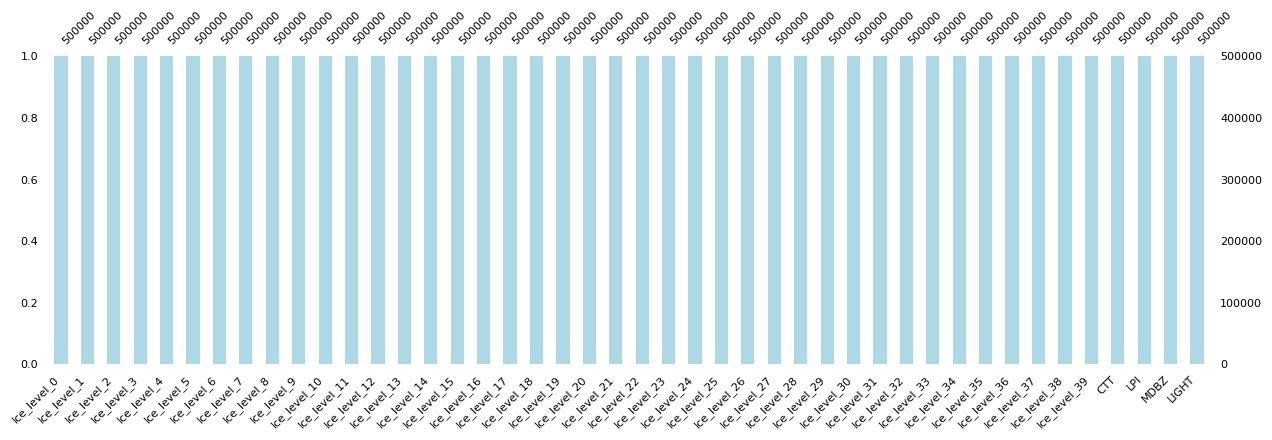

In [ ]:
msno.bar(df=df, color='lightblue', figsize=(15, 4), fontsize=8)

##Trabajo Práctico N°1



###Consignas

Antes de proceder a la eleccion del algoritmo de ML es necesario analizar el dataset. El analisis consiste en ver si hay consistencia en los datos, si hay datos perdidos y si los datos se relacionan de alguna manera o son independientes. El objetivo final es decidir si es realmente necesario emplear todos los datos para entrenar nuestro algoritmo o si podemos prescindir de algunos de ellos.

En nuestro caso, el dataset contiene 44 columnas. Las primeras 40 columnas brindan información acerca de la cantidad de hielo disponible en una columna del dominio. Las columnas restantes son la temperatura de tope de nube (CTT), el "lightning potential index" (LPI), la reflectividad maxima en la columna (MDBZ) y la ultima columna es la actividad electrica que queremos estimar (LIGHT).

Para explorar el dataset, te propongo las siguientes preguntas:

1. Comenzando con las 40 columnas correspondientes a la cantidad de hielo, Elegí 4 columnas del dominio (o sea 4 filas del dataset), dos con gran actividad electrica y dos con actividad electrica nula. Para dichas columnas, ¿Cómo es la distribucion de hielo en funcion de la altura? ¿Qué información relevante puede obtenerse de dicha distribución?

2. Si en vez de usar todas las columnas de hielo, reemplazo esta informacion por algun percentil, ¿Como es la distribucion de esta y de las demas variables en termino de la presencia o ausencia de actividad electrica?

3. Centrandonos en las filas con actividad electrica no nula, realizá Boxplots para cada variable. ¿Hay outliers? Ahora, compará lo obtenido con Boxplots para las filas con actividad eléctrica nula. ¿Se observan cambios predominantes en alguna de las variables debido a la presencia o ausencia de actividad eléctrica?

4. ¿Como es la dependencia de las variables relevantes entre sí? Acá puede ser de ayuda graficar un heatmap usando seaborn.  






###Desarrollo

Comenzamos el desarrollo del trabajo práctico N°1 analizando la distribución de la presencia de hielo en función de los distintos niveles de medición, tomando 4 observaciones muestrales o columnas del dominio, 2 con gran actividad eléctrica y 2 con actividad eléctrica nula. Para ello, vamos a analizar los valores del campo 'LIGHT' que nos arroja dicho nivel de actividad.

In [ ]:
_total_columnas_dominio=len(df)
print(f'La cantidad de observaciones o columnas del dominio es de {_total_columnas_dominio}')

La cantidad de observaciones o columnas del dominio es de 500000


In [ ]:
print(f'El campo LIGHT que nos arroja una medición de la actividad eléctrica, tiene las siguientes estadisticas descriptivas:')
df['LIGHT'].describe()

El campo LIGHT que nos arroja una medición de la actividad eléctrica, tiene las siguientes estadisticas descriptivas:


,LIGHT
count,500000.00000000000000000000
mean,9.57899600000000006617
std,25.09699924992480646324
min,0.00000000000000000000
25%,0.00000000000000000000
50%,1.00000000000000000000
75%,15.00000000000000000000
max,1142.00000000000000000000


Podemos graficar un boxplot para visualizar la distribución de los valores de la variables "LIGHT" y detectar la presencia de valores outliers.

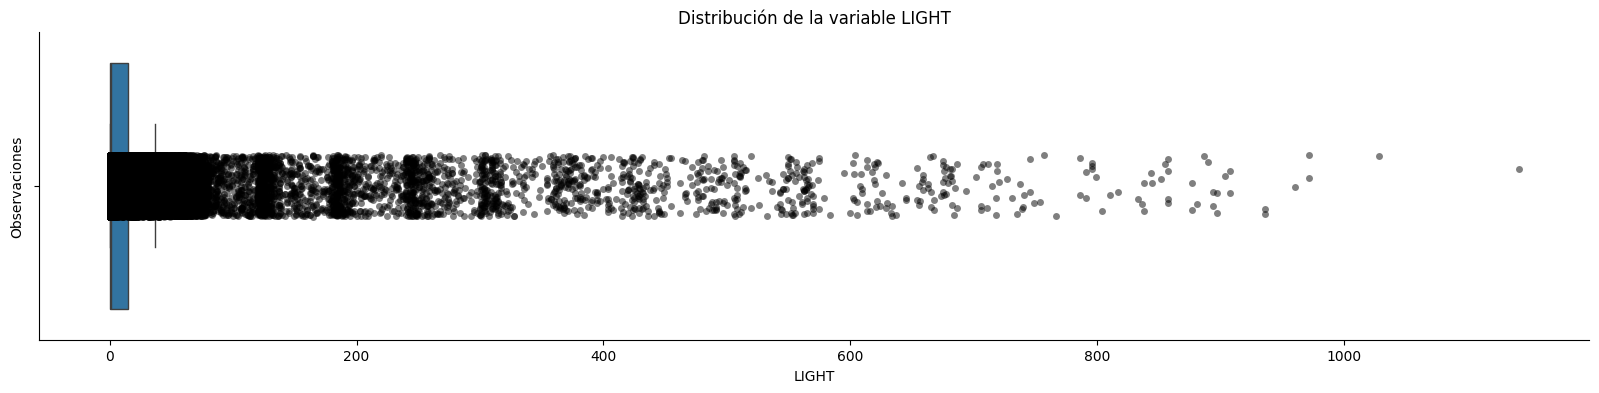

In [ ]:
plt.figure(figsize=(20, 4))

g = sns.boxplot(x=df['LIGHT'], showfliers=False)
sns.stripplot(x=df['LIGHT'], color='black', alpha=0.5)
sns.despine()

plt.xlabel('LIGHT')
plt.ylabel('Observaciones')
plt.title('Distribución de la variable LIGHT')

plt.show()

Procedemos a obtener dos observaciones con valor 0 para el campo LIGHT y dos observaciones con un valor que se encuentre en el percentil 99, para no considerar valores outliers como puede ser el caso del 1142. Posteriormente, para la utilización de algoritmos, trabajaremos dichos outliers de acuerdo a un criterio específico.

In [ ]:
_from=df['LIGHT'].quantile(0.95)
_to=df['LIGHT'].quantile(0.99)
print(f'Para valores de alta actividad tomaremos valores entre {_from} y {_to}')

Para valores de alta actividad tomaremos valores entre 40.0 y 59.0


In [ ]:
# Filtrar las filas donde el valor de 'LIGHT' está entre x y z
df_reducido_alta_actividad = df[(df['LIGHT'] >= _from) & (df['LIGHT'] <= _to)]

# Seleccionar dos filas al azar del DataFrame filtrado
df_reducido_alta_actividad = df_reducido_alta_actividad.sample(n=2, random_state=1)
df_reducido_alta_actividad

,Ice_level_0,Ice_level_1,Ice_level_2,Ice_level_3,Ice_level_4,Ice_level_5,Ice_level_6,Ice_level_7,Ice_level_8,Ice_level_9,...,Ice_level_34,Ice_level_35,Ice_level_36,Ice_level_37,Ice_level_38,Ice_level_39,CTT,LPI,MDBZ,LIGHT
11422,0.00019305266323490000,0.00020186617621220000,0.00022018396703060001,0.00025460458709849999,0.00030153401894490001,0.00036735017783929999,0.00046073470730329999,0.00058666616678230000,0.00075295427814119997,0.00095854263054199996,...,0.00000033273258281952,0.00000000107818487471,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,199.66897583007806815658,40.89968490600585937500,59.58596038818360085543,49.00000000000000000000
450870,0.00000015367993455584,0.00000017669786700480,0.00000021828705598637,0.00000028537050411614,0.00000039479385804952,0.00000058751544429470,0.00000095809571121208,0.00000170733676441159,0.00000333487901116314,0.00000693440870236373,...,0.00000090001640273840,0.00000001282933581592,0.00000000016132094272,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,206.36172485351559657829,135.14486694335937500000,53.39170837402343750000,40.00000000000000000000


In [ ]:
# Filtrar las filas donde el valor de 'LIGHT' sea igual a 0.
df_reducido_baja_actividad = df[df['LIGHT']==0]

# Seleccionar dos filas al azar del DataFrame filtrado
df_reducido_baja_actividad = df_reducido_baja_actividad.sample(n=2, random_state=1)
df_reducido_baja_actividad

,Ice_level_0,Ice_level_1,Ice_level_2,Ice_level_3,Ice_level_4,Ice_level_5,Ice_level_6,Ice_level_7,Ice_level_8,Ice_level_9,...,Ice_level_34,Ice_level_35,Ice_level_36,Ice_level_37,Ice_level_38,Ice_level_39,CTT,LPI,MDBZ,LIGHT
402255,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000458676933,0.00000000004232353704,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,221.06781005859372157829,0.63950300216674804688,23.39113998413085937500,0.00000000000000000000
257393,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000007416,0.00000000000000225317,...,0.00000000000000990362,0.00000000000000003550,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,208.68861389160159092171,0.01788745820522300023,-3.65137672424316406250,0.00000000000000000000


In [ ]:
df_reducido=pd.concat([df_reducido_alta_actividad,df_reducido_baja_actividad]).reset_index(drop=True)
df_reducido['ID_COLUMN']=df_reducido.index

Unimos ambos dataframe y obtenemos el Dataframe reducido con las 4 observaciones o columnas del dominio

In [ ]:
df_reducido

,Ice_level_0,Ice_level_1,Ice_level_2,Ice_level_3,Ice_level_4,Ice_level_5,Ice_level_6,Ice_level_7,Ice_level_8,Ice_level_9,...,Ice_level_35,Ice_level_36,Ice_level_37,Ice_level_38,Ice_level_39,CTT,LPI,MDBZ,LIGHT,ID_COLUMN
0,0.00019305266323490000,0.00020186617621220000,0.00022018396703060001,0.00025460458709849999,0.00030153401894490001,0.00036735017783929999,0.00046073470730329999,0.00058666616678230000,0.00075295427814119997,0.00095854263054199996,...,0.00000000107818487471,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,199.66897583007806815658,40.89968490600585937500,59.58596038818360085543,49.00000000000000000000,0
1,0.00000015367993455584,0.00000017669786700480,0.00000021828705598637,0.00000028537050411614,0.00000039479385804952,0.00000058751544429470,0.00000095809571121208,0.00000170733676441159,0.00000333487901116314,0.00000693440870236373,...,0.00000001282933581592,0.00000000016132094272,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,206.36172485351559657829,135.14486694335937500000,53.39170837402343750000,40.00000000000000000000,1
2,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000458676933,0.00000000004232353704,...,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,221.06781005859372157829,0.63950300216674804688,23.39113998413085937500,0.00000000000000000000,2
3,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000007416,0.00000000000000225317,...,0.00000000000000003550,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,208.68861389160159092171,0.01788745820522300023,-3.65137672424316406250,0.00000000000000000000,3


Realizamos algunas transformaciones para poder trabajarlo de forma adecuada. En primer lugar, mediante el método melt, reducimos el número de columnas pasando los valores a filas.

In [ ]:
df_reducido_melt=df_reducido.melt(id_vars=['ID_COLUMN','CTT','LPI','MDBZ','LIGHT'],value_name='ICE',var_name='LEVEL')
df_reducido_melt['LEVEL']=df_reducido_melt['LEVEL'].str.split('_').str[2]
df_reducido_melt

,ID_COLUMN,CTT,LPI,MDBZ,LIGHT,LEVEL,ICE
0,0,199.66897583007806815658,40.89968490600585937500,59.58596038818360085543,49.00000000000000000000,0,0.00019305266323490000
1,1,206.36172485351559657829,135.14486694335937500000,53.39170837402343750000,40.00000000000000000000,0,0.00000015367993455584
2,2,221.06781005859372157829,0.63950300216674804688,23.39113998413085937500,0.00000000000000000000,0,0.00000000000000000000
3,3,208.68861389160159092171,0.01788745820522300023,-3.65137672424316406250,0.00000000000000000000,0,0.00000000000000000000
4,0,199.66897583007806815658,40.89968490600585937500,59.58596038818360085543,49.00000000000000000000,1,0.00020186617621220000
...,...,...,...,...,...,...,...
155,3,208.68861389160159092171,0.01788745820522300023,-3.65137672424316406250,0.00000000000000000000,38,0.00000000000000000000
156,0,199.66897583007806815658,40.89968490600585937500,59.58596038818360085543,49.00000000000000000000,39,0.00000000000000000000
157,1,206.36172485351559657829,135.14486694335937500000,53.39170837402343750000,40.00000000000000000000,39,0.00000000000000000000
158,2,221.06781005859372157829,0.63950300216674804688,23.39113998413085937500,0.00000000000000000000,39,0.00000000000000000000


Y luego, estamos en condiciones de observar la distribución del hielo por altura o nivel, según los distintos grados de actividad eléctrica recolectados en la muestra.

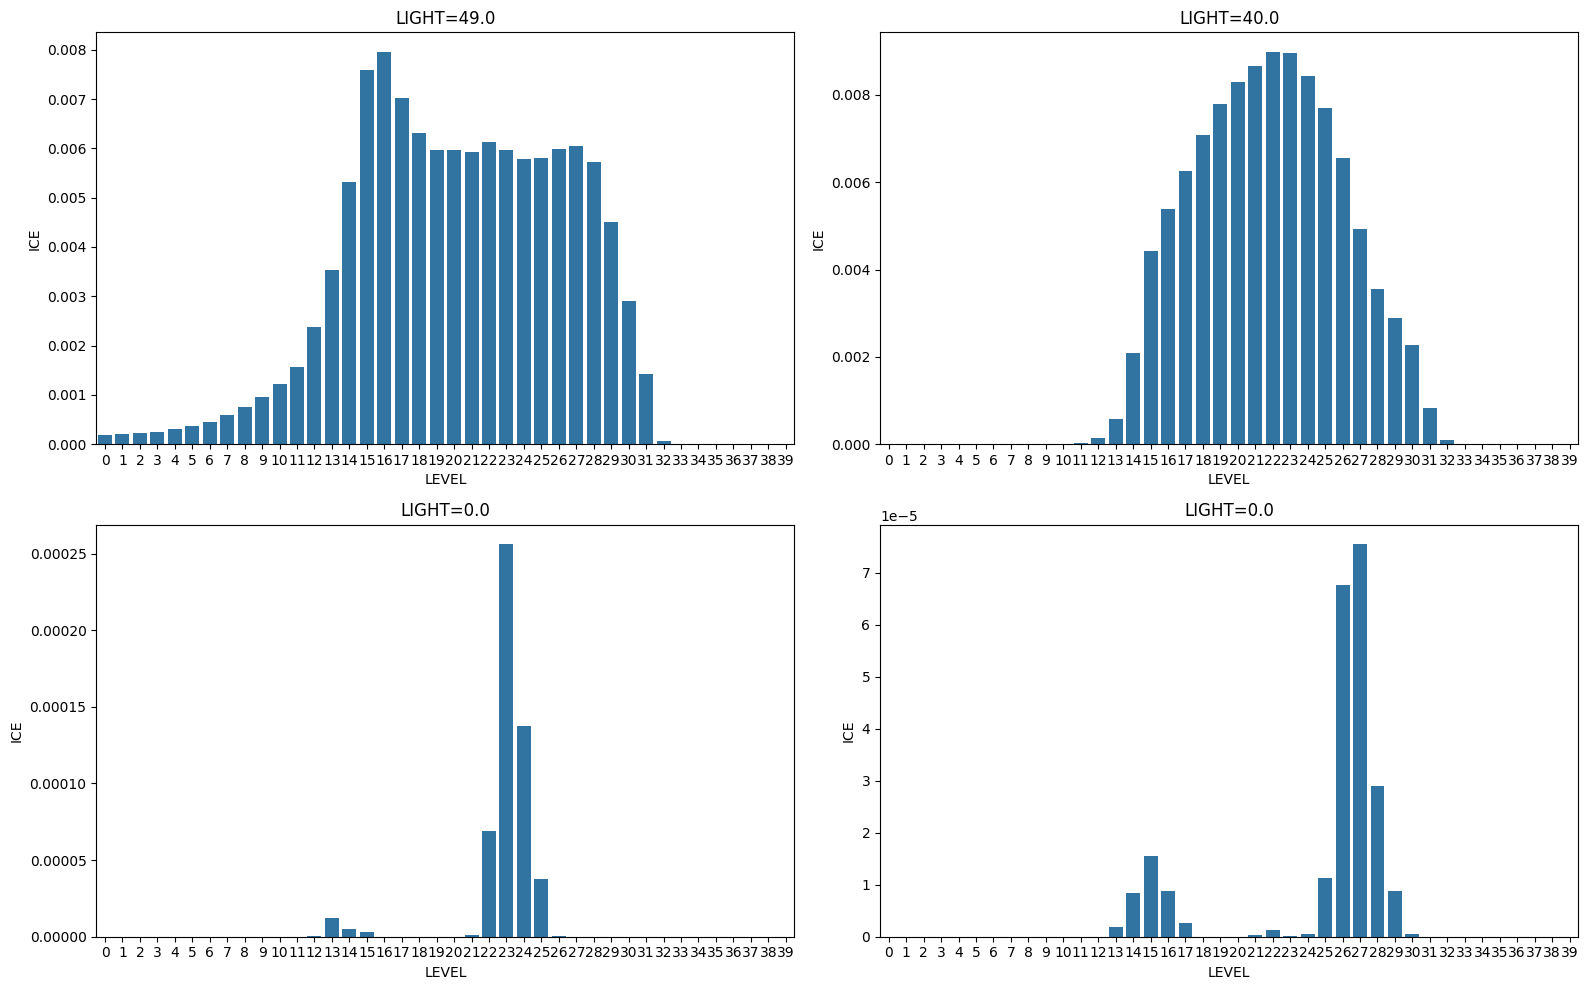

In [ ]:
# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

for i in df_reducido_melt['ID_COLUMN'].unique():
  _light = df_reducido_melt[df_reducido_melt['ID_COLUMN'] == i]['LIGHT'].unique()[0]
  sns.barplot(x='LEVEL', y='ICE', data=df_reducido_melt[df_reducido_melt['ID_COLUMN']==i], estimator=np.mean,ax=axs[i//2, i%2])
  axs[i//2, i%2].set_title(f'LIGHT={_light}')


plt.tight_layout()

Dado que lo que estamos analizando es un modelo para predecir el nivel de actividad eléctrica teniendo en cuenta la presencia de hielo en los distintos niveles de medición, nos interesa tener un orden de magnitudes de esta relación, por lo cuál realizamos un ploteo en conjunto para todos los niveles de actividad electrica seleccionados

<ipython-input-18-b36be66dfb02>:2: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.lineplot(data=df_reducido_melt, x='LEVEL', y='ICE', hue='ID_COLUMN',


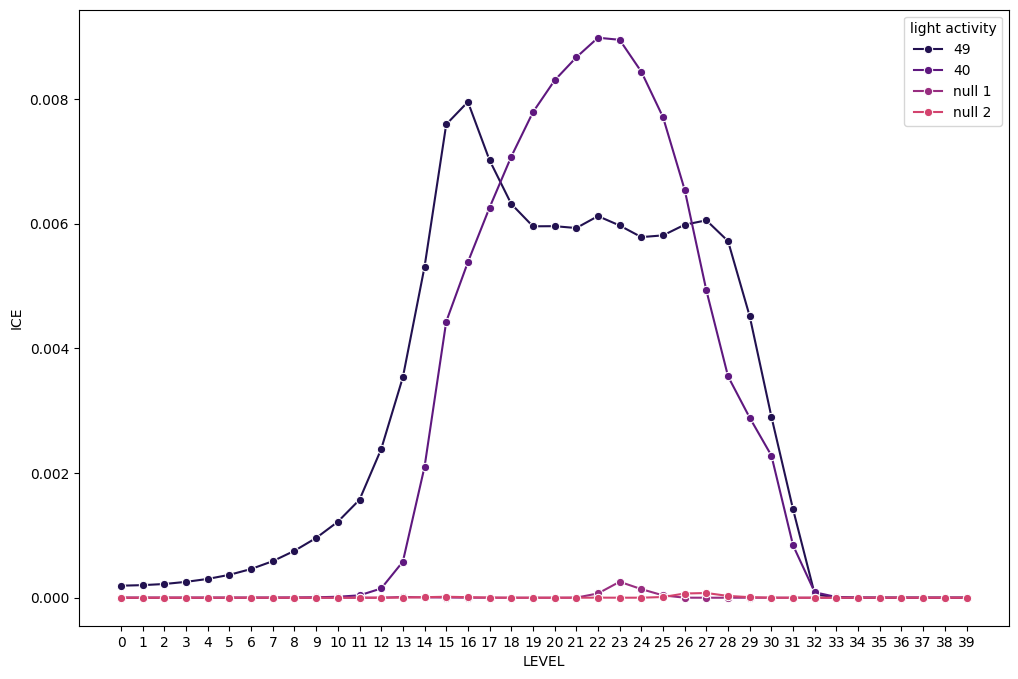

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_reducido_melt, x='LEVEL', y='ICE', hue='ID_COLUMN',
             palette=sns.color_palette("magma"), marker='o')
new_labels = ['49', '40', 'null 1', 'null 2']
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles, labels=new_labels, title='light activity')
plt.show()

Podemos obsevar que en las 4 observaciones, considerando tanto aquellas que tienen un nivel alto de actividad eléctrica como aquellas que tienen actividad eléctrica nula, el hielo se concentra a partir del nivel 10 aproximadamente y hasta el nivel 32. A su vez, si observamos la distribución del hielo entre las observaciones con LIGHT=40 y LIGHT=49 podemos ver que la distribución de hielo entre niveles es más uniforme y en ordenes de magnitud es más grande que en los casos con LIGHT=0.

Luego, a los fines de trabajar bajo el principio de parsimonia, podríamos considerar solo algunos niveles de medición de hielo, para trabajar con menos columnas. Para ello, podemos calcular distintos percentiles para cada observacion(columna del dominio) y observar la distribución de dicha variable creada en relación a la variable LIGHT. A su vez, calculamos distintos "Grados" de actividad eléctrica, para poder comparar casos mas homogéneos entre sí respecto a esta variable:

In [ ]:
#Calculamos el percentil 25,50, 75  y 99 de las mediciones de hielo para cada observacion o columna del dominio.
ice_columns = df.columns[:40]
_df_quantiles=df.copy()
_df_quantiles['ice_25'] = _df_quantiles[ice_columns].quantile(0.25, axis=1)
_df_quantiles['ice_50'] = _df_quantiles[ice_columns].quantile(0.50, axis=1)
_df_quantiles['ice_75'] = _df_quantiles[ice_columns].quantile(0.75, axis=1)
_df_quantiles['ice_99'] = _df_quantiles[ice_columns].quantile(0.99, axis=1)

#Definimos rangos de nivel de actividad eléctrica de 5 en 5 hasta 20, consierando que en el percentil 75, el valor de LIGHT es de 15.
conditions = [
    (_df_quantiles['LIGHT'] == 0),
    (_df_quantiles['LIGHT'] > 20),
    (_df_quantiles['LIGHT'] > 15),
    (_df_quantiles['LIGHT'] > 10),
    (_df_quantiles['LIGHT'] > 5),
    (_df_quantiles['LIGHT'] <= 5)
]

#Definimos las etiquetas
choices = ['0', '>20', '>15', '>10', '>5','<=5']

#Creamos una nueva columnas
_df_quantiles['NIVEL_ACTIVIDAD'] = np.select(conditions, choices)
_df_quantiles['LIGHT_CHECK']=np.where(_df_quantiles['NIVEL_ACTIVIDAD']=='0','SIN ACTIVIDAD','CON ACTIVIDAD')
_df_quantiles[['ice_25','ice_50','ice_75','ice_99','NIVEL_ACTIVIDAD','LIGHT_CHECK']].head(5)

,ice_25,ice_50,ice_75,ice_99,NIVEL_ACTIVIDAD,LIGHT_CHECK
0,0.00000000000000000000,0.00000009345598783739,0.00035788116656472501,0.00380917995003977753,<=5,CON ACTIVIDAD
1,0.00000000000000000000,0.00000000000000000000,0.00000000000000001369,0.00000000096903490732,0,SIN ACTIVIDAD
2,0.00000000000000000000,0.00000015696019062261,0.00031025005591792500,0.00337354725459585629,<=5,CON ACTIVIDAD
3,0.00000000000000000000,0.00000000000000000000,0.00000000000000001601,0.00000000094417917762,0,SIN ACTIVIDAD
4,0.00000000000000000000,0.00000033796497689309,0.00049917268188432503,0.00421282108873126653,<=5,CON ACTIVIDAD


In [ ]:
#Separamos los dataframe en 2 según la presencia o ausencia de actividad eléctrica.
_df_activ_positiva=_df_quantiles[_df_quantiles['LIGHT_CHECK']=='CON ACTIVIDAD']
_df_sin_act=_df_quantiles[_df_quantiles['LIGHT_CHECK']=='SIN ACTIVIDAD']

Y finalmente, ploteamos los histogramas de los percentiles para evaluar de forma visual la distribucion de estos en función de la presencia (y el grado de actividad) o ausencia de actividad eléctrica.

"\n#Sin actividad eléctrica\nsns.histplot(data=_df_sin_act, x='ice_50', hue='NIVEL_ACTIVIDAD',kde=True,ax=axs[1,0])\naxs[1,0].set_title('Percentil 50 de Hielo - Sin actividad')\naxs[1,0].set_ylim(0,10000)\n\nsns.histplot(data=_df_sin_act, x='ice_75', hue='NIVEL_ACTIVIDAD',kde=True,ax=axs[1,1])\naxs[1,1].set_title('Percentil 75 de Hielo - Sin actividad')\naxs[1,1].set_ylim(0,10000)\nsns.histplot(data=_df_sin_act, x='ice_99', hue='NIVEL_ACTIVIDAD',kde=True,ax=axs[1,2])\naxs[1,2].set_title('Percentil 99 de Hielo - Sin actividad')\naxs[1,2].set_ylim(0,10000)\n\nfig.suptitle('Distribución del Percentil 50, Percentil 75, y Percentil 99 según el nivel de actividad eléctrica')\n\nplt.tight_layout()\n"

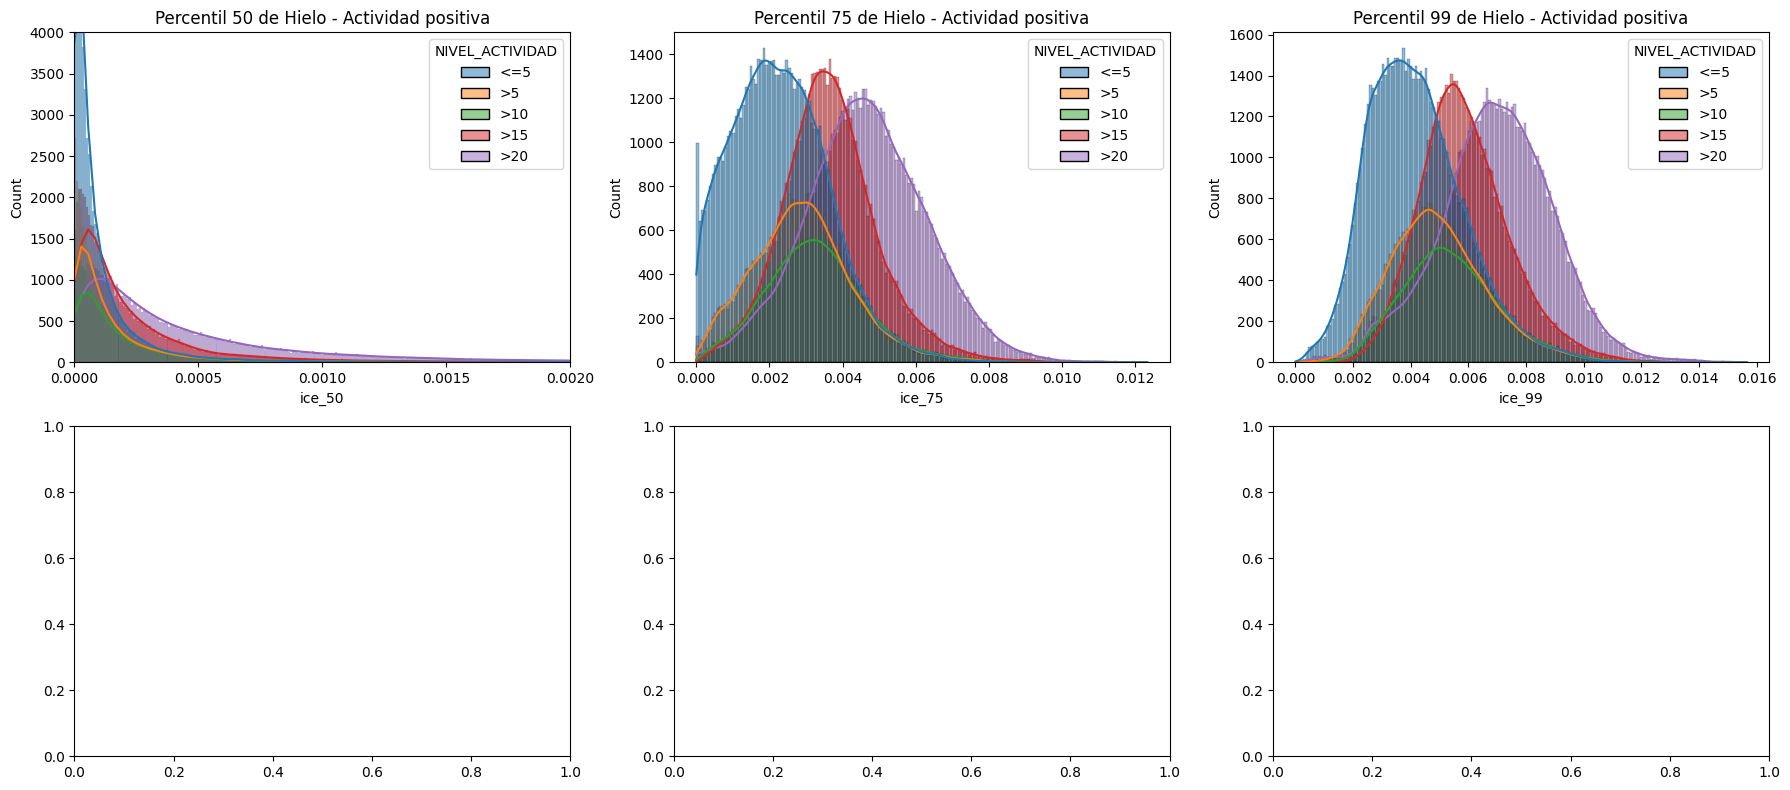

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 8))

#Con actividad eléctrica
sns.histplot(data=_df_activ_positiva, x='ice_50', hue='NIVEL_ACTIVIDAD',kde=True,ax=axs[0,0])
axs[0,0].set_title('Percentil 50 de Hielo - Actividad positiva')
axs[0,0].set_ylim(0,4000)
axs[0,0].set_xlim(0,0.002)
xticks_values = [0.0, 0.0005, 0.001, 0.0015, 0.002]
axs[0,0].set_xticks(xticks_values)

sns.histplot(data=_df_activ_positiva, x='ice_75', hue='NIVEL_ACTIVIDAD',kde=True,ax=axs[0,1])
axs[0,1].set_title('Percentil 75 de Hielo - Actividad positiva')

sns.histplot(data=_df_activ_positiva, x='ice_99', hue='NIVEL_ACTIVIDAD',kde=True,ax=axs[0,2])
axs[0,2].set_title('Percentil 99 de Hielo - Actividad positiva')
plt.tight_layout()
'''
#Sin actividad eléctrica
sns.histplot(data=_df_sin_act, x='ice_50', hue='NIVEL_ACTIVIDAD',kde=True,ax=axs[1,0])
axs[1,0].set_title('Percentil 50 de Hielo - Sin actividad')
axs[1,0].set_ylim(0,10000)

sns.histplot(data=_df_sin_act, x='ice_75', hue='NIVEL_ACTIVIDAD',kde=True,ax=axs[1,1])
axs[1,1].set_title('Percentil 75 de Hielo - Sin actividad')
axs[1,1].set_ylim(0,10000)
sns.histplot(data=_df_sin_act, x='ice_99', hue='NIVEL_ACTIVIDAD',kde=True,ax=axs[1,2])
axs[1,2].set_title('Percentil 99 de Hielo - Sin actividad')
axs[1,2].set_ylim(0,10000)

fig.suptitle('Distribución del Percentil 50, Percentil 75, y Percentil 99 según el nivel de actividad eléctrica')

plt.tight_layout()
'''

Podemos observar que tomando el percentil 75 y 99, la distribución de la medición de hielo según el nivel de actividad eléctrica se asemeja a una normal. Además podemos observar que aunque estan solapadas en las colas, parece haber diferencias en la distribucion (y en las medias) entre niveles de actividad eléctrica sobre todo entre las bajas respecto a las altas. Por otro lado, si tomamos en cuenta el percentil 50, aún existen muchos valores con nivel de hielo 0. Por ende, si queremos predecir la actividad electrica según la presencia de hielo en nivel, sería mejor tomar el percentil 75 y el 99.

Por otra parte, observamos la distribución del resto de las variables

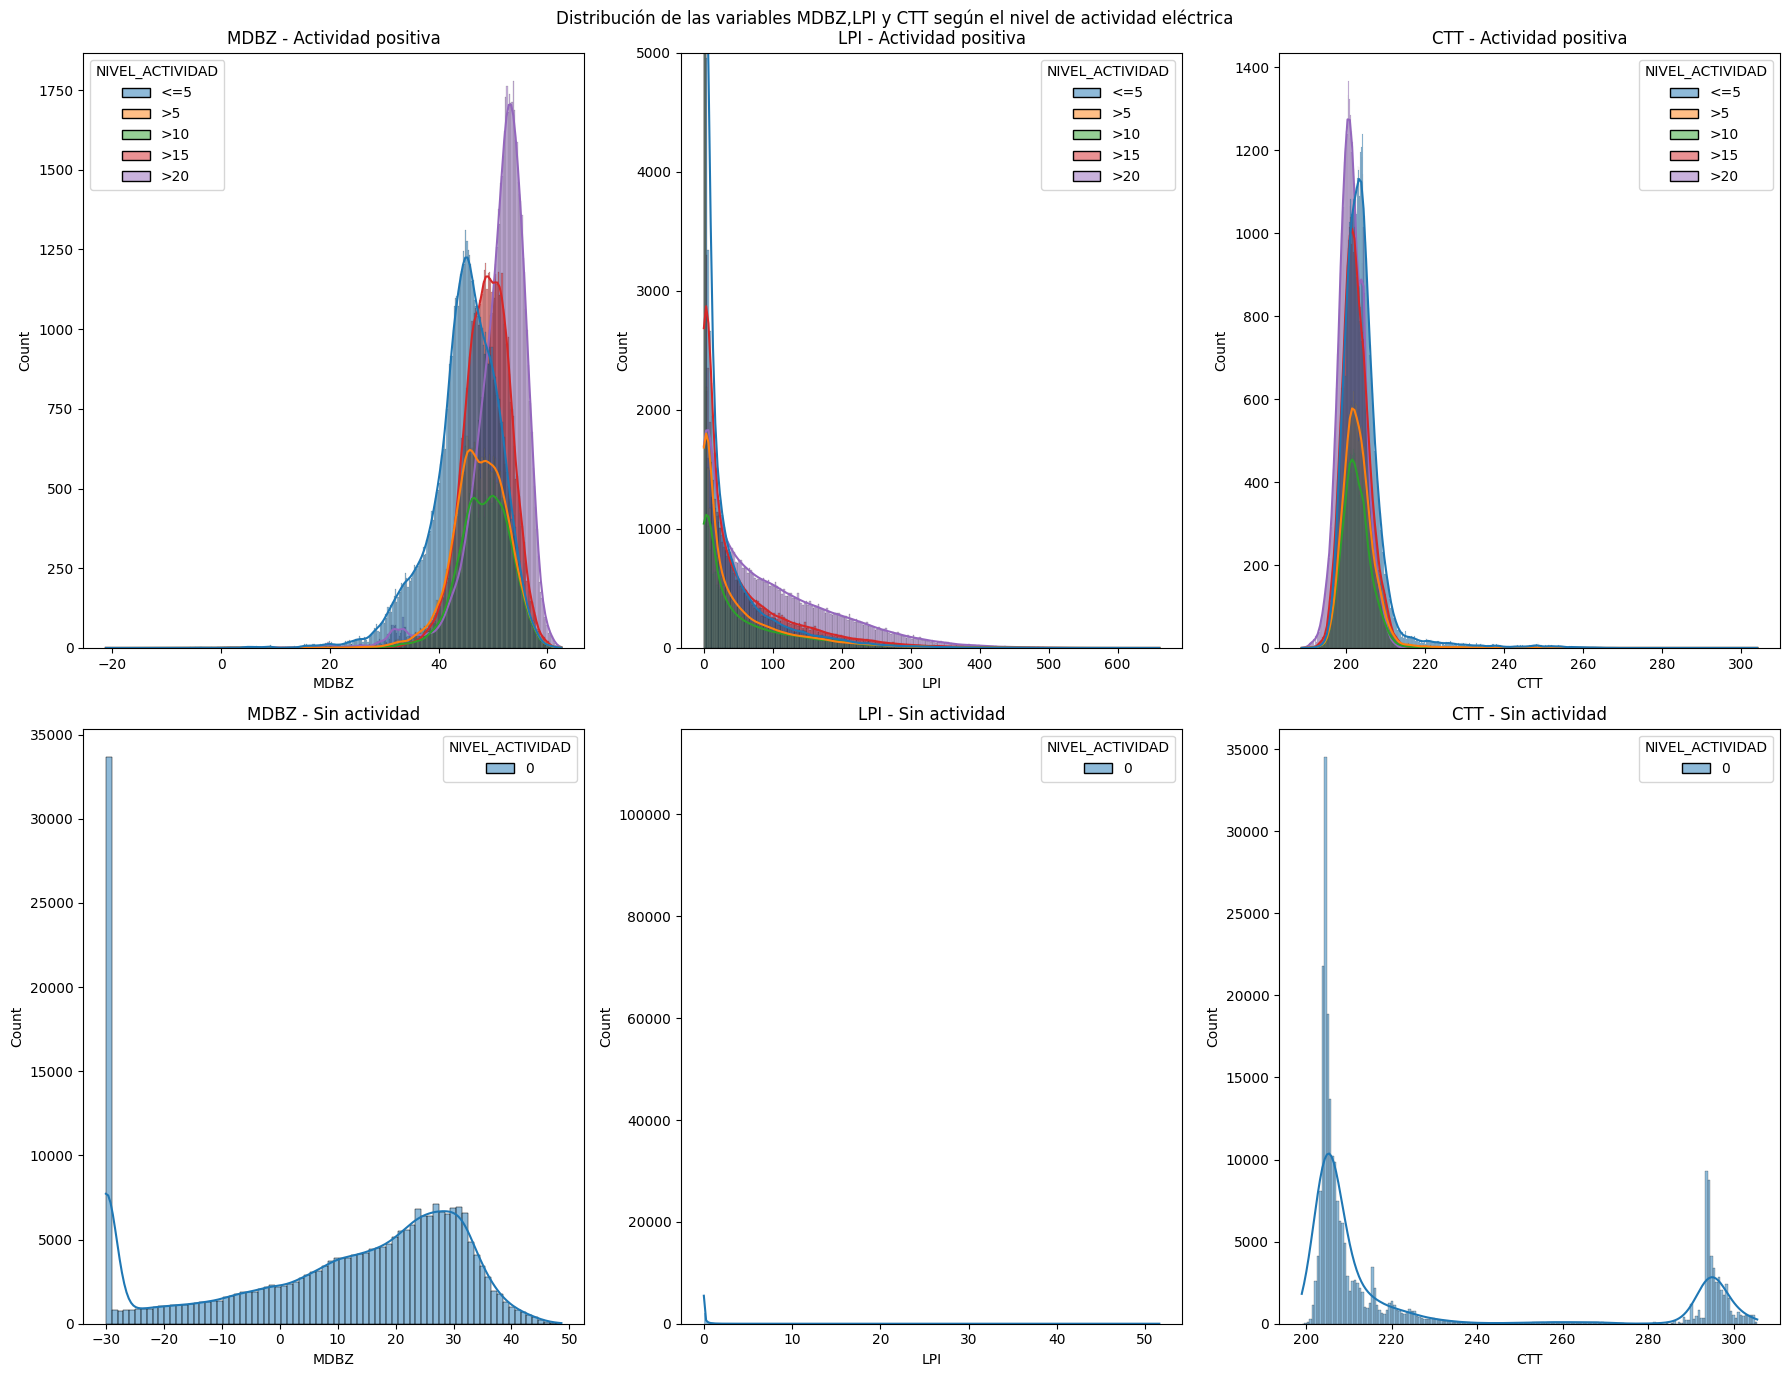

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 14))
sns.histplot(data=_df_activ_positiva, x='MDBZ', hue='NIVEL_ACTIVIDAD',kde=True,ax=axs[0,0])
axs[0,0].set_title('MDBZ - Actividad positiva')
sns.histplot(data=_df_activ_positiva, x='LPI', hue='NIVEL_ACTIVIDAD',kde=True,ax=axs[0,1])
axs[0,1].set_title('LPI - Actividad positiva')
axs[0,1].set_ylim(0,5000)
sns.histplot(data=_df_activ_positiva, x='CTT', hue='NIVEL_ACTIVIDAD',kde=True,ax=axs[0,2])
axs[0,2].set_title('CTT - Actividad positiva')
sns.histplot(data=_df_sin_act, x='MDBZ', hue='NIVEL_ACTIVIDAD',kde=True,ax=axs[1,0])
axs[1,0].set_title('MDBZ - Sin actividad')
sns.histplot(data=_df_sin_act, x='LPI', hue='NIVEL_ACTIVIDAD',kde=True,ax=axs[1,1])
axs[1,1].set_title('LPI - Sin actividad')
sns.histplot(data=_df_sin_act, x='CTT', hue='NIVEL_ACTIVIDAD',kde=True,ax=axs[1,2])
axs[1,2].set_title('CTT - Sin actividad')


fig.suptitle('Distribución de las variables MDBZ,LPI y CTT según el nivel de actividad eléctrica')
plt.tight_layout()


En cuanto a estas distribuciones, podemos observar lo siguiente:


*   **MDBZ**: ante la presencia de actividad eléctrica, la variable presenta una media mayor, entorno a 45-50 y menor desviación estandar. En el caso de ausencia de actividad, el valor más frecuente se concentra en el -30, con una mayor desviación estandar de los datos.
*   **LPI**: ante la presencia de actividad eléctrica, si bien la mayor parte de los datos se encuentran en el 0, existen observaciones para las cuales esta variable asume valores de hasta 600. Ante ausencia de actividad electrica, los valores van desde el 0 hasta el 50.
*   **CTT**: ante la presencia de actividad eléctrica, la distribución de esta variable es similar ante distintos niveles de actividad, con una media marcada en el valor de 200-205. En el caso de ausencia de actividad, la distribución es bimodal, con un subconjunto de observaciones con media en 210 y otro en 290 aproximadamente.



Ahora, para los incisos siguientes, separo el dataframe, según contengan o no valores con actividad eléctrica

In [ ]:
_df_activ_positiva=_df_activ_positiva.drop(columns={'ice_25','ice_50','ice_75'})
_df_activ_positiva=_df_activ_positiva.melt(id_vars=['CTT','LPI','MDBZ','LIGHT','NIVEL_ACTIVIDAD','LIGHT_CHECK'],value_name='CANTIDAD HIELO',var_name='LEVEL')
_df_activ_positiva.head(5)

,CTT,LPI,MDBZ,LIGHT,NIVEL_ACTIVIDAD,LIGHT_CHECK,LEVEL,CANTIDAD HIELO
0,219.47990417480468750000,1.95278000831604003906,35.44601058959960937500,2.00000000000000000000,<=5,CON ACTIVIDAD,Ice_level_0,0.00000000350015483264
1,220.60833740234372157829,19.96059417724609375000,37.21746063232421875000,1.00000000000000000000,<=5,CON ACTIVIDAD,Ice_level_0,0.00000000775620812021
2,217.20233154296875000000,30.20295524597167968750,40.34687805175781250000,2.00000000000000000000,<=5,CON ACTIVIDAD,Ice_level_0,0.00000001205342137212
3,215.96704101562500000000,1.16336977481842041016,35.85285568237304687500,1.00000000000000000000,<=5,CON ACTIVIDAD,Ice_level_0,0.00000000851451531503
4,217.56871032714843750000,84.77419281005859375000,42.06846237182617187500,1.00000000000000000000,<=5,CON ACTIVIDAD,Ice_level_0,0.00000002649623986883


In [ ]:
_df_sin_act=_df_sin_act.drop(columns={'ice_25','ice_50','ice_75'})
_df_sin_act=_df_sin_act.melt(id_vars=['CTT','LPI','MDBZ','LIGHT','NIVEL_ACTIVIDAD','LIGHT_CHECK'],value_name='CANTIDAD HIELO',var_name='LEVEL')
_df_sin_act.head(5)

,CTT,LPI,MDBZ,LIGHT,NIVEL_ACTIVIDAD,LIGHT_CHECK,LEVEL,CANTIDAD HIELO
0,302.75625610351562500000,0.00000000000000000000,-30.00000000000000000000,0.00000000000000000000,0,SIN ACTIVIDAD,Ice_level_0,0.00000000000000000000
1,302.79589843750000000000,0.00000000000000000000,-30.00000000000000000000,0.00000000000000000000,0,SIN ACTIVIDAD,Ice_level_0,0.00000000000000000000
2,302.75485229492187500000,0.00000000000000000000,-30.00000000000000000000,0.00000000000000000000,0,SIN ACTIVIDAD,Ice_level_0,0.00000000000000000000
3,302.70510864257812500000,0.00000000000000000000,-30.00000000000000000000,0.00000000000000000000,0,SIN ACTIVIDAD,Ice_level_0,0.00000000000000000000
4,302.83554077148437500000,0.00000000000000000000,-30.00000000000000000000,0.00000000000000000000,0,SIN ACTIVIDAD,Ice_level_0,0.00000000000000000000


Podemos mediante el uso nuevamente de los boxplots, obtener la distribución de la medición de hielo para cada uno de los niveles de medición, tanto para los casos con actividad eléctrica como para aquellos sin actividad.

KeyboardInterrupt: 

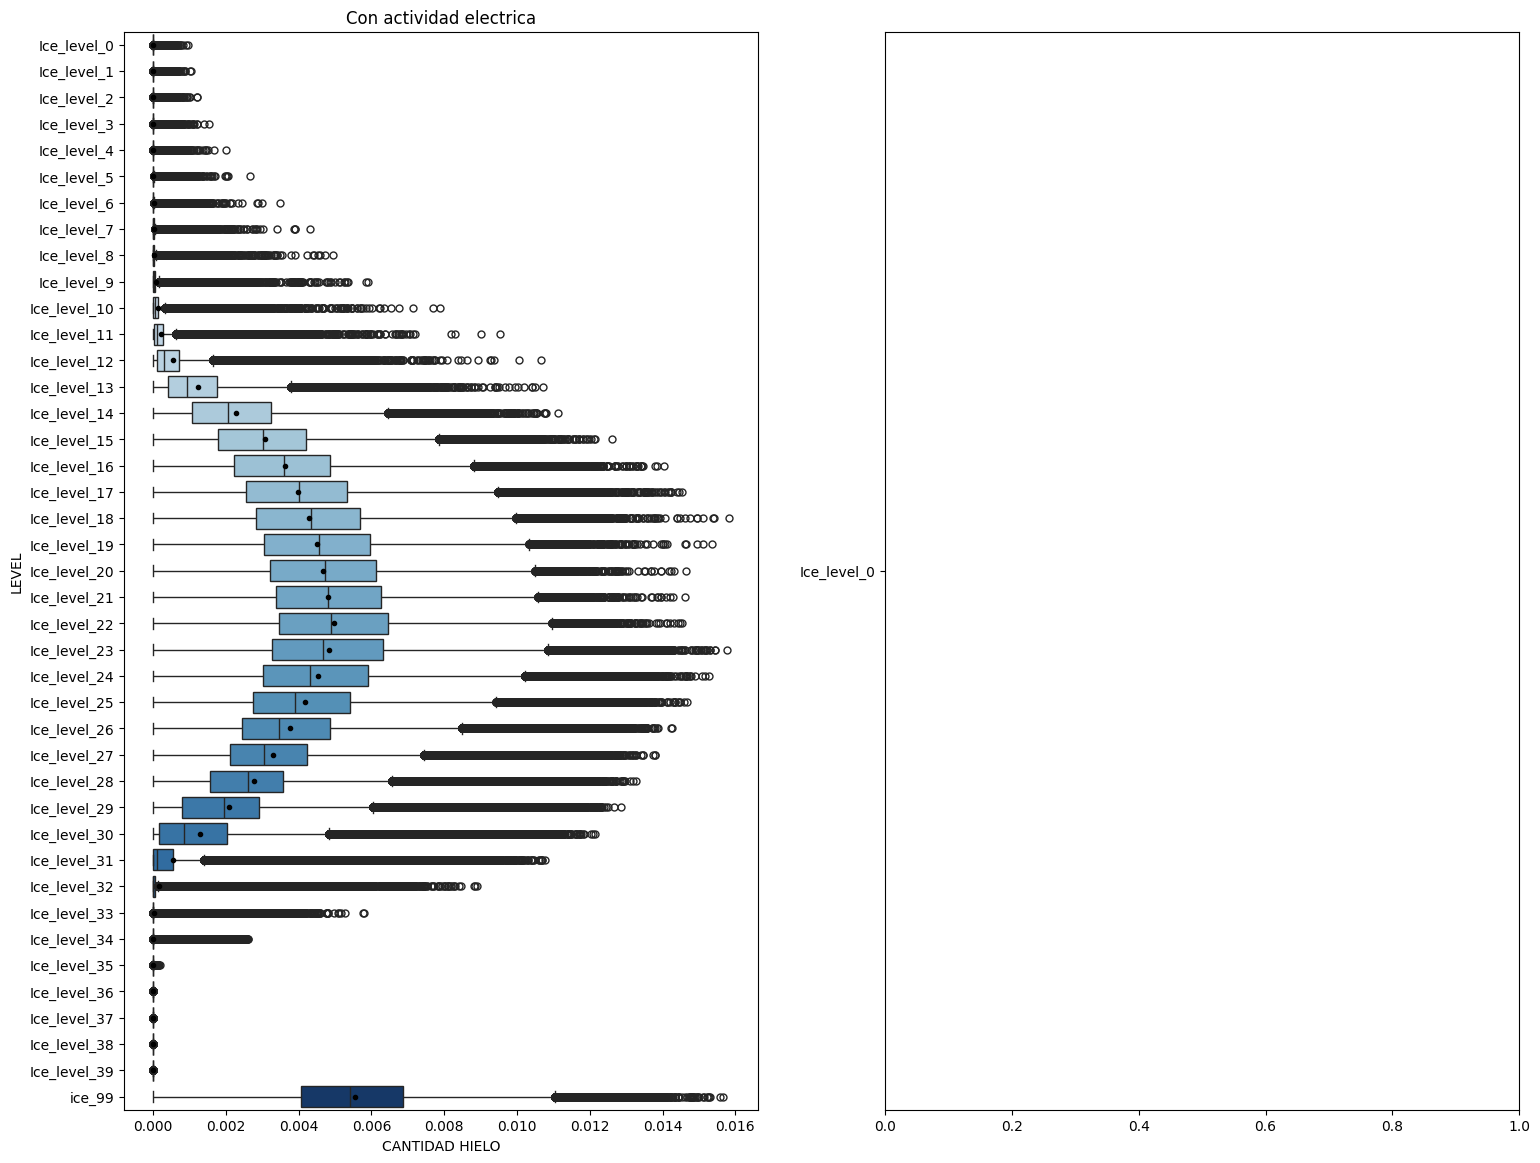

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 14))
sns.boxplot(x='CANTIDAD HIELO', y='LEVEL', data=_df_activ_positiva,ax=axs[0], fliersize=5, palette="Blues",hue='LEVEL',showmeans=True, meanprops={"marker":".","markerfacecolor":"black", "markeredgecolor":"black"})
axs[0].set_title('Con actividad electrica')
sns.boxplot(x='CANTIDAD HIELO', y='LEVEL', data=_df_sin_act,ax=axs[1], fliersize=5, palette="Blues",hue='LEVEL',showmeans=True, meanprops={"marker":".","markerfacecolor":"black", "markeredgecolor":"black"})
axs[1].set_title('Sin actividad electrica')


fig.suptitle('Distribución de la cantidad de hielo por niveles')

plt.show()

Tal como fue mencionado, en ambos casos, la presencia de hielo, mas allá de la diferencia de magnitudes, se concentra entre los niveles 10 y 30 aproximadamente, aunque ante presencia de actividad, existen más valores extremos positivos en los niveles más bajos. Por otro lado, si observamos el percentil 99 creado, el mismo tiene una mediana de 0.005 para actividad eléctrica mientras que sin actividad eléctrica la mediana es de 0.0005.

Luego, podemos realizar el mismo análisis con respecto al resto de las variables de interés:

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(16, 8))
sns.boxplot(x='CTT', y='LIGHT_CHECK', data=_df_quantiles,ax=axs[0], fliersize=5, palette="Blues",hue='LIGHT_CHECK',showmeans=True, meanprops={"marker":".","markerfacecolor":"black", "markeredgecolor":"black"})
axs[0].set_title('CTT')
sns.boxplot(x='LPI', y='LIGHT_CHECK', data=_df_quantiles,ax=axs[1], fliersize=5, palette="Blues",hue='LIGHT_CHECK',showmeans=True, meanprops={"marker":".","markerfacecolor":"black", "markeredgecolor":"black"})
axs[1].set_title('LPI')
sns.boxplot(x='MDBZ', y='LIGHT_CHECK', data=_df_quantiles,ax=axs[2], fliersize=5, palette="Blues",hue='LIGHT_CHECK',showmeans=True, meanprops={"marker":".","markerfacecolor":"black", "markeredgecolor":"black"})
axs[2].set_title('MDBZ')

fig.suptitle('Distribución de las variables CTT,LPI y MDBZ según exista o no actividad eléctrica')
plt.tight_layout()

Por último, podemos observar que sucede con la correlación lineal entre las distintas variables, identificar si existen relaciones, con que grado de asociación y en que dirección. Para ello, podemos obtener la matriz de correlaciones, utilizar un heatmap y tambien gráficar diagramas de dispersión.


In [ ]:
#Ploteamos la matriz de correlación con un heatmap en el fondo para visualizar mejor las correlaciones.
_matriz_correlación=df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(_matriz_correlación, annot=True, cmap='RdBu', center=0, linewidth=.5, fmt=".2f", annot_kws={"size": 8})
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

Incluimos tambien los percentiles calculados anteriormente vs las variables "CTT,LPI,MDBZ,LIGHT"

In [ ]:
subdf = _df_quantiles[['ice_25', 'ice_50', 'ice_75', 'ice_99', 'CTT', 'LPI', 'MDBZ', 'LIGHT']]

mask = np.triu(np.ones_like(subdf.corr(), dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(subdf.corr(), cmap='RdBu', center=0, annot=True,
            square=True, linewidths=.5)

En complemento a la matriz de correlaciones, podemos utilizar gráficas de dispersion, para obtener si es que existe, algún patrón de relación visual entre los pares de las variables de interés.

In [ ]:
plt.figure(figsize=(20, 10))
sns.pairplot(data = _df_quantiles[['ice_25', 'ice_50', 'ice_75', 'ice_99', 'LIGHT','CTT','LPI','MDBZ']], diag_kind="kde")

Analizando la matriz de correlaciones y los pairplot, podemos observar ciertos patrones que siguen la misma linea que venimos analizando en los pasos previos y esbozar algunas conclusiones preliminares:


*   Existe una correlación lineal positiva alta entre aproximadamente los primeros 12 niveles de hielo. Ello sugiere que las variables explicativas aportan la misma información y el hecho de incluir todas ellas en el análisis podría generar problemas (como una multicolinealidad). A su vez, vimos que para esos niveles, el hielo era practicamente nulo, tanto para los casos con actividad eléctrica como para aquellos sin actividad.
*   Lo mismo sucede para aquellos niveles en donde observamos previamente que se acumula mayor cantidad de hielo, tanto ante la presencia de actividad eléctrica como ante la falta de esta. La distribución de hielo parece ser bastante uniforme entre los niveles 12 y 32.
*   Esto podría reforzar la idea de utilizar un percentil, que capture la medición de hielo que se encuentre en un rango intercuartilico determinado, en lugar de utilizar la medición individual de varios niveles.
*   Observamos una relación negativa entre la CTT y la presencia de hielo en cada nivel, lo cuál tiene sentido ya que temperaturas menores favorecen la creación de hielo.
*   Observamos una relación positiva entre la LPI y la presencia de hielo en cada nivel, con mayor correlación para los niveles mencionados de entre 12 y 32.
*   Observamos una relación positiva entre la MDBZ y la presencia de hielo en cada nivel, con mayor correlación para los niveles mencionados de entre 12 y 32.
*   Observamos una relación positiva entre la LIGHT y la presencia de hielo en cada nivel, con mayor correlación para los niveles mencionados de entre 12 y 32.
*   Siguiendo la matriz de correlaciones, la correlación más alta entre LIGHT y los percentiles, se observa en el percentil 75.








## Trabajo Práctico N°2

###Consignas

En el TP1 vimos que algunas de las variables presentadas en el dataset original eran redundantes. Por tal motivo, se sugirió generar nuevas columnas que reemplacen la información de estas variables.

1) Expliquen que criterio usaron para seleccionar las nuevas columnas y combinando las columnas restantes del dataset original con las nuevas columnas, presenten el nuevo dataset.

2) Agregar una columna más al dataframe que incluya la integral del hielo en altura. Es decir, una columna que resulte de la suma de la cantidad de hielo en cada nivel.

3) La variable LIGHT (MDBZ) muestra dispersión en su distribución. ¿Qué métodos se pueden implementar para reducir dicha dispersión? Elegir uno e incluir esa nueva columna como variable TARGET del dataset.

4) Partiendo del nuevo dataset, que no debería tener más de 10 columnas, hagan un análisis de componentes principales (PCA). ¿Es necesario estandarizar o escalar los datos?

5) Haciendo uso de "components_" pueden ver que coeficientes se asocian a cada componente principal para cada variable. ¿Pueden explicar los resultados aquí obtenidos?

6) Grafiquen la varianza explicada por cada una de las componentes obtenidas.

7) Dados los resultados obtenidos, ¿cuál creen ustedes que es el número óptimo de componentes principales que podrían sumar al dataset?

###Desarrollo

En el trabajo práctico n°1, analizamos la distribución de la presencia de hielo en función de los distintos niveles de medición y encontramos que la presencia de hielo tanto para aquellas columnas del dominio en las que se observaba actividad eléctrica como aquellas en las que no, tenia lugar entre el nivel 12 y 30 aproximadamente. A su vez, pudimos ver mediante la matriz de correlaciones, que existe una correlación fuerte las columnas, particularmente, tomando grupos de niveles, es decir, hay una fuerte correlación entre las mediciones de los niveles del 1 al 12 y entre aquellos del 12 al 30\
Por lo tanto, el criterio utilizado, fue reemplazar todas esas columnas por distintas medidas de posición. En particular, calculamos los percentiles 25,50,75 y 99 de la medición de hielo para cada una de las observaciones muestrales (Columnas de dominio). Para continuar el trabajo, consideraremos solamente el percentil 25 y el 99. Omitimos el percentil 50 y 75 ya que presentan una correlación fuerte con los otros dos percentiles.
Realizada dicha transformación, y añadiendo la media y una columna más que sumarice la cantidad total de hielo por columna del dominio (integral), nuestro dataset para continuar trabajando queda de la siguiente manera:

In [ ]:
_df_quantiles['Integral'] = _df_quantiles.iloc[:,0:40].sum(axis=1)
_df_quantiles['Mean'] = _df_quantiles.iloc[:, 0:40].mean(axis=1)
_df_tp2 = _df_quantiles[['LIGHT','CTT','MDBZ','LPI','ice_25','ice_50','ice_75','ice_99','Integral','Mean']]
_df_tp2.head(5)

,LIGHT,CTT,MDBZ,LPI,ice_25,ice_50,ice_75,ice_99,Integral,Mean
0,2.00000000000000000000,219.47990417480468750000,35.44601058959960937500,1.95278000831604003906,0.00000000000000000000,0.00000009345598783739,0.00035788116656472501,0.00380917995003977753,0.02109048305592762379,0.00052726207639819064
1,0.00000000000000000000,302.75625610351562500000,-30.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000001369,0.00000000096903490732,0.00000000367293914864,0.00000000009182347872
2,1.00000000000000000000,220.60833740234372157829,37.21746063232421875000,19.96059417724609375000,0.00000000000000000000,0.00000015696019062261,0.00031025005591792500,0.00337354725459585629,0.02047383652150829014,0.00051184591303770721
3,0.00000000000000000000,302.79589843750000000000,-30.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000001601,0.00000000094417917762,0.00000000363935909912,0.00000000009098397748
4,2.00000000000000000000,217.20233154296875000000,40.34687805175781250000,30.20295524597167968750,0.00000000000000000000,0.00000033796497689309,0.00049917268188432503,0.00421282108873126653,0.02539323600462160130,0.00063483090011554001


Por otra parte, pudimos observar en el punto N°1 que la variable target "**LIGHT**" presenta gran dispersión y valores outliers, lo cuál es deseable de corregir al momento de continuar con los análisis. Estos outliers surgen debido a la calibración de la herramienta de medición. A su vez, la variable **MDBZ**, no tiene valores outliers, pero si dispersión grande y valores negativos. Por la naturaleza de esta última variable, no tiene sentido considerar los valores negativos, dado que la misma mide el valor máximo del reflejo del radar en una columna vertical. El reflejo del radar, medido en decibelios Z (dBZ), es una medida de la intensidad de las precipitaciones y se utiliza comúnmente en la meteorología para analizar y predecir tormentas y otros fenómenos meteorológicos. Por ende, podemos realizar una limpieza de los valores negativos e imputar los mismos con 0.

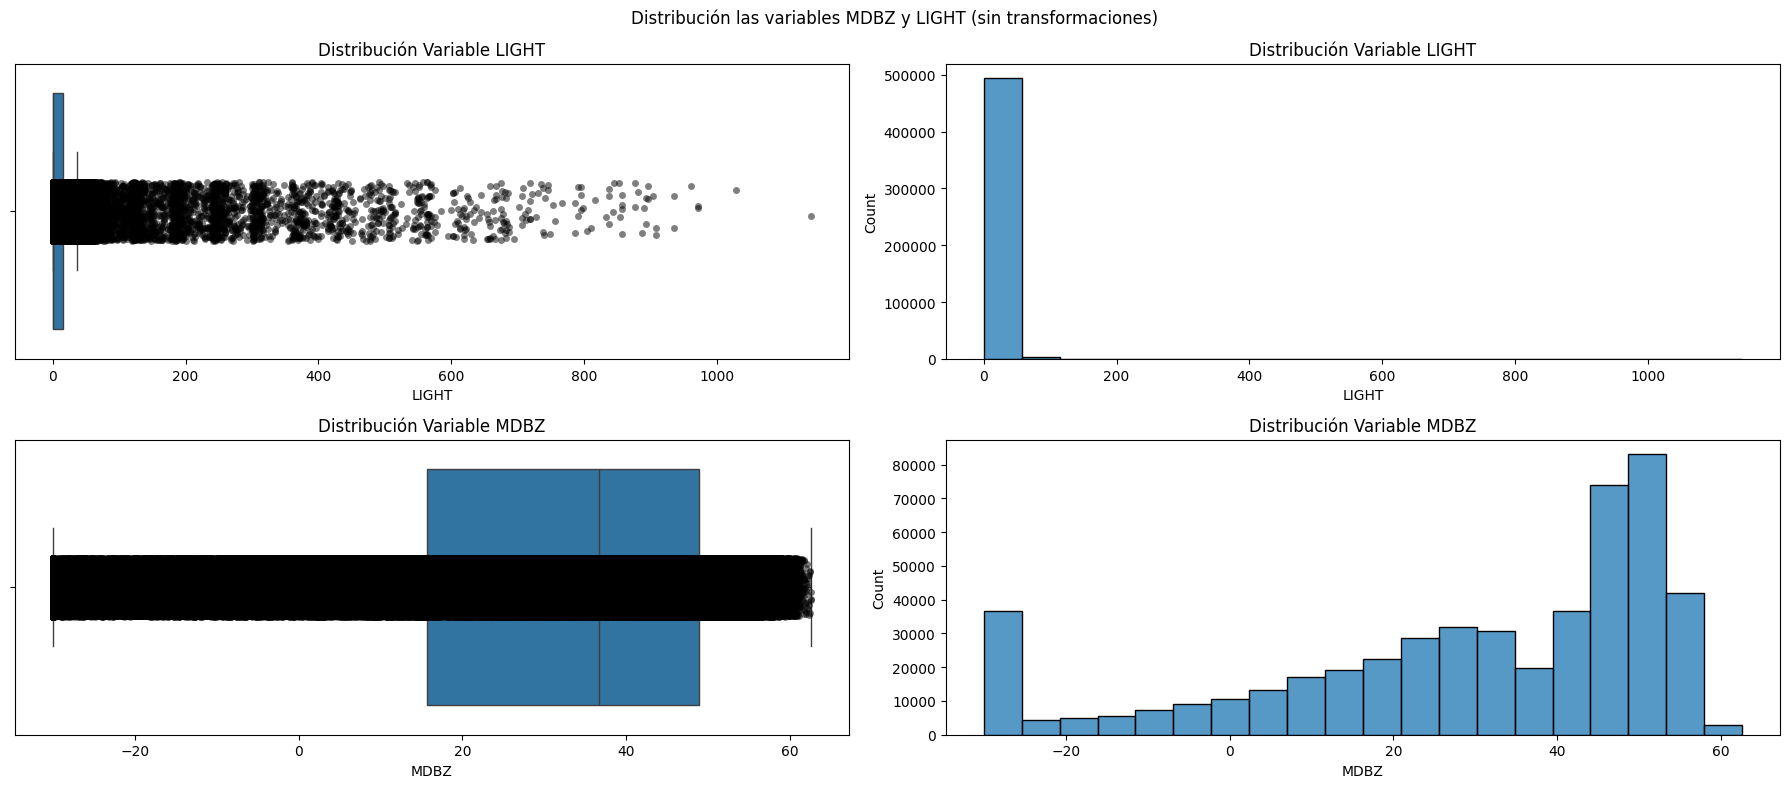

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8))
sns.boxplot(x='LIGHT',data=_df_quantiles,ax=axs[0,0],showfliers=False)
sns.stripplot(x='LIGHT',data=_df_quantiles, color='black',ax=axs[0,0],alpha=0.5)
axs[0,0].set_title('Distribución Variable LIGHT')
sns.histplot(x='LIGHT',data=_df_quantiles,ax=axs[0,1], bins = 20)

axs[0,1].set_title('Distribución Variable LIGHT')

sns.boxplot(x='MDBZ',data=_df_quantiles,ax=axs[1,0],showfliers=False)
sns.stripplot(x='MDBZ',data=_df_quantiles, color='black',ax=axs[1,0],alpha=0.5)
axs[1,0].set_title('Distribución Variable MDBZ')
sns.histplot(x='MDBZ',data=_df_quantiles,ax=axs[1,1],bins = 20)
axs[1,1].set_title('Distribución Variable MDBZ')

fig.suptitle('Distribución las variables MDBZ y LIGHT (sin transformaciones)')

plt.tight_layout()
plt.show()


Para realizar dicha limpieza, podriamos considerar las siguientes alternativas:

* Excluir los valores outliers o extremos mediante una limpieza por percentiles, perdiendo observaciones.
* Imputar los valores outliers o extremos utilizando algún valor específico, pudiendo ser el valor de algún percentil o un valor fijado según el conocimiento de los datos.
* Aplicar transformaciones del tipo logaritmica
* Aplicar raiz cuadrada o cúbica

En este caso, vamos a limitar los valores de la variable LIGHT mediante el método "**Winsorización**" de la libería Spicy, limitando el valor superior al percentil 0,995 e imputando las observaciones que sean mayores con el valor de dicho percentil. A su vez, le vamos a aplicar logaritmo a la variable "LIGHT" para aplanar la distribución y disminuir la dispersión. Esta variable "LIGHT" transformada, la llamaremos "**ln_LIGHT**.

Para la variable MDBZ, vamos a considerar los valores que sean mayores a 0, imputando los valores negativos para no perder observaciones.

In [ ]:
#_df_tp2['LIGHT'] = mstats.winsorize(_df_tp2['LIGHT'], limits=[0, 0.005])
_df_tp2.loc[_df_tp2['LIGHT'] > 100, 'LIGHT'] = 100
_df_tp2['MDBZ'] = np.where(_df_tp2['MDBZ']<0,0,_df_quantiles['MDBZ'])

<ipython-input-27-89bd49565ffa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_tp2['LIGHT'] = mstats.winsorize(_df_tp2['LIGHT'], limits=[0, 0.005])
<ipython-input-27-89bd49565ffa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_tp2['MDBZ'] = np.where(_df_tp2['MDBZ']<0,0,_df_quantiles['MDBZ'])


Aplicamos un "ln" con un escalar de 0.1

In [ ]:
_df_tp2['ln_LIGHT'] = _df_tp2['LIGHT'] + 0.1
_df_tp2['ln_LIGHT'] = np.log(_df_tp2.ln_LIGHT)

<ipython-input-28-f3ca0459dfea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_tp2['ln_LIGHT'] = _df_tp2['LIGHT'] + 0.1
<ipython-input-28-f3ca0459dfea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df_tp2['ln_LIGHT'] = np.log(_df_tp2.ln_LIGHT)


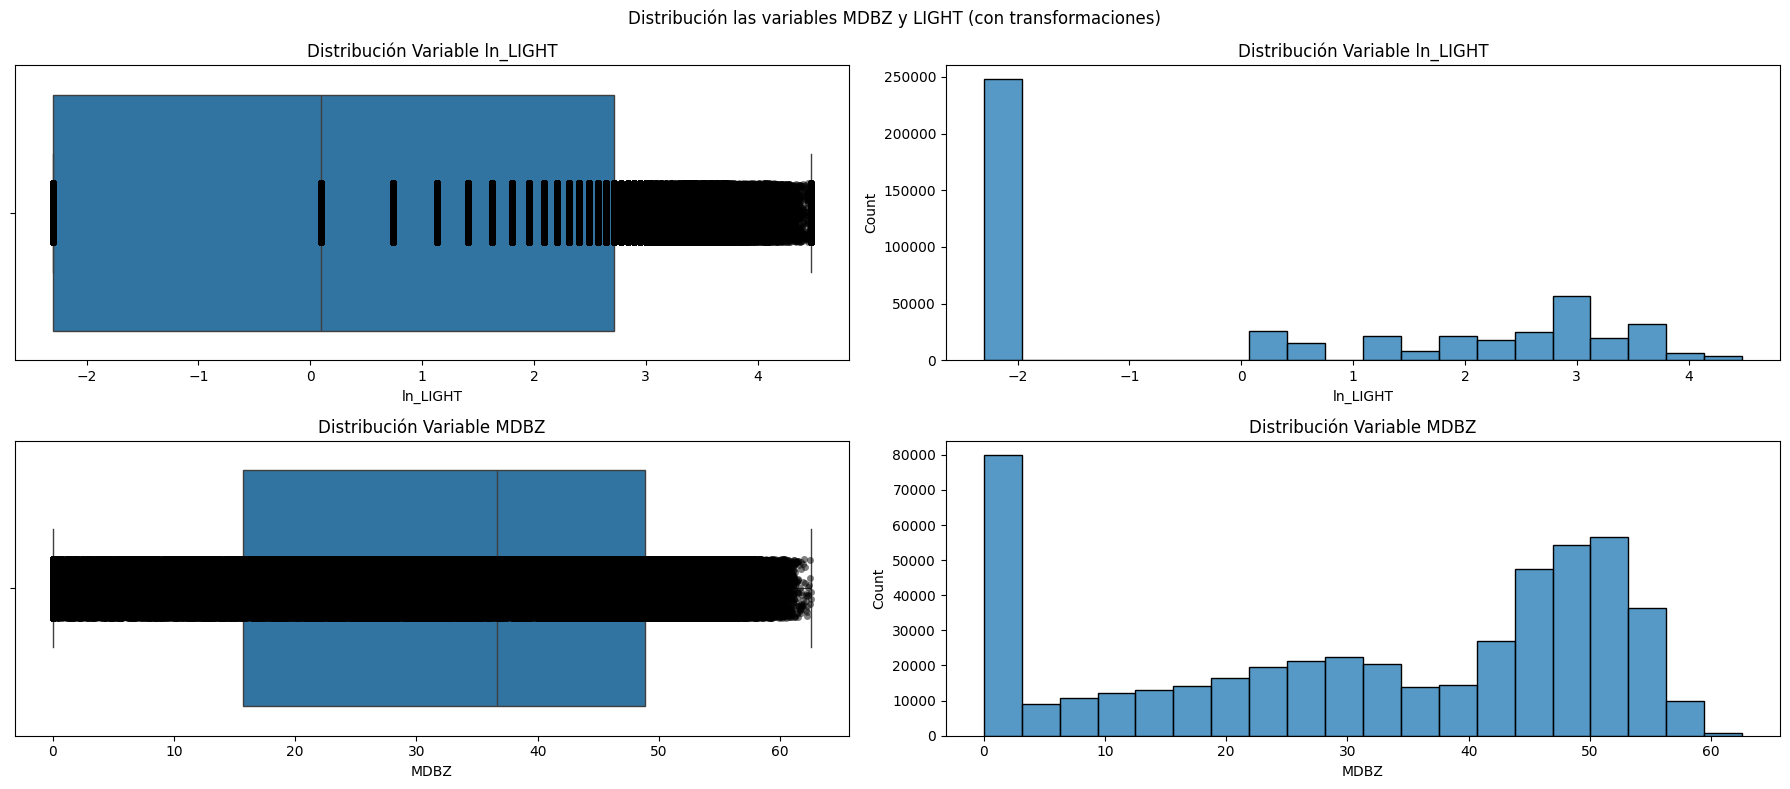

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(18, 8))
sns.boxplot(x='ln_LIGHT',data=_df_tp2,ax=axs[0,0],showfliers=False)
sns.stripplot(x='ln_LIGHT',data=_df_tp2, color='black',ax=axs[0,0],alpha=0.5)
axs[0,0].set_title('Distribución Variable ln_LIGHT')
sns.histplot(x='ln_LIGHT',data=_df_tp2,ax=axs[0,1], bins = 20)

axs[0,1].set_title('Distribución Variable ln_LIGHT')

sns.boxplot(x='MDBZ',data=_df_tp2,ax=axs[1,0],showfliers=False)
sns.stripplot(x='MDBZ',data=_df_tp2, color='black',ax=axs[1,0],alpha=0.5)
axs[1,0].set_title('Distribución Variable MDBZ')
sns.histplot(x='MDBZ',data=_df_tp2,ax=axs[1,1],bins = 20)
axs[1,1].set_title('Distribución Variable MDBZ')

fig.suptitle('Distribución las variables MDBZ y LIGHT (con transformaciones)')

plt.tight_layout()
plt.show()


Ahora bien, es posible que si bien aplicamos una reducción considerable a nuestro conjunto de features o variables explicativas, aun algunas de ellas sean redundantes para el modelo y reduciendo la dimensionalidad del dataset podemos mantener el mismo nivel de información, pero trabajando con un mejor modelo en términos de rendimiento y eficiencia. Por ello, vamos a aplicar PCA (Principal component analysis) y evaluar los resultados.\

En primer lugar, y dado que las variables que hemos seleccionado tienen distintas escalas, es muy importante la estandarización de los datos para que la escala de cada unas de las variables no tenga implicancia en la medición y en la utilización de la metodología. En este caso, utilizamos la standarización de sklearn, transformando los datos para que tengan media 0 y desviación estándar 1


En prime lugar, armamos un dataframe con las columnas que hemos seleccionado:

In [ ]:
_df_tp2_final= _df_tp2[['CTT','LPI','MDBZ','LIGHT','Integral','ice_99','ice_25','Mean','ln_LIGHT']].copy()
_df_tp2_final.head()

,CTT,LPI,MDBZ,LIGHT,Integral,ice_99,ice_25,Mean,ln_LIGHT
0,219.47990417480468750000,1.95278000831604003906,35.44601058959960937500,2.00000000000000000000,0.02109048305592762379,0.00380917995003977753,0.00000000000000000000,0.00052726207639819064,0.74193734472937733493
1,302.75625610351562500000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000367293914864,0.00000000096903490732,0.00000000000000000000,0.00000000009182347872,-2.30258509299404545700
2,220.60833740234372157829,19.96059417724609375000,37.21746063232421875000,1.00000000000000000000,0.02047383652150829014,0.00337354725459585629,0.00000000000000000000,0.00051184591303770721,0.09531017980432493486
3,302.79589843750000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000363935909912,0.00000000094417917762,0.00000000000000000000,0.00000000009098397748,-2.30258509299404545700
4,217.20233154296875000000,30.20295524597167968750,40.34687805175781250000,2.00000000000000000000,0.02539323600462160130,0.00421282108873126653,0.00000000000000000000,0.00063483090011554001,0.74193734472937733493


Chequeamos datos faltantes y tipos de datos

In [ ]:
_df_tp2_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   CTT       500000 non-null  float64
 1   LPI       500000 non-null  float64
 2   MDBZ      500000 non-null  float64
 3   LIGHT     500000 non-null  float64
 4   Integral  500000 non-null  float64
 5   ice_99    500000 non-null  float64
 6   ice_25    500000 non-null  float64
 7   Mean      500000 non-null  float64
 8   ln_LIGHT  500000 non-null  float64
dtypes: float64(9)
memory usage: 34.3 MB


Y finalmente, armamos nuestro pipeline para la aplicación del PCA, ajustando el modelo en el siguiente bloque, previo estandarización de los valores

In [ ]:
pipeline = Pipeline([
    ('sc', StandardScaler()),
    ('pca', PCA())
])
#Dejo solo las variables a utilizar
X = _df_tp2_final.loc[:,['CTT', 'LPI', 'MDBZ', 'Integral', 'ice_99',
       'ice_25', 'Mean']]
pipeline.fit(X)

Pipeline(steps=[('sc', StandardScaler()), ('pca', PCA())])

In [ ]:
pca = pipeline.named_steps['pca']
print(pca.explained_variance_ratio_*100)

print(f'Podemos ver que los 3 primeros ejes explican el {sum(pca.explained_variance_ratio_[:3]*100):0.2f}%')

[6.35551333e+01 1.36422778e+01 1.20951369e+01 7.53242821e+00
 2.76868104e+00 4.06342753e-01 2.23035429e-16]
Podemos ver que los 3 primeros ejes explican el 89.29%


Realizamos un análisis de cada uno de los componentes e visualizamos el array que contiene los mismos, transformandolo en un pandas Dataframe para posteriormente concatenar las columnas al dataframe original.

In [ ]:
components = pipeline.fit_transform(X) ## obtenemos los componentes diractamente en un array
columnas = [f'pc{i}' for i in range(1, 8)]
df_components = pd.DataFrame(components, columns = columnas) ###
print(df_components.info())
print(df_components.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   pc1     500000 non-null  float64
 1   pc2     500000 non-null  float64
 2   pc3     500000 non-null  float64
 3   pc4     500000 non-null  float64
 4   pc5     500000 non-null  float64
 5   pc6     500000 non-null  float64
 6   pc7     500000 non-null  float64
dtypes: float64(7)
memory usage: 26.7 MB
None
                      pc1                     pc2                     pc3  \
0 -0.41816258849553833432 -0.16584476219552898857 -0.16698380219929184753   
1 -3.15848507333500316818  1.20258765674274359370  2.01935350316692741046   
2 -0.38646464999140311969 -0.16849844298398194975 -0.00272340609714890030   
3 -3.15886832241051562775  1.20312202554832436974  2.02035246601132634225   
4  0.02606003781647564174 -0.23829602982402683931  0.03562485107462626949   

                      pc4              

Luego, seleccionamos los 3 primeros componentes que explican el 89.29% de la variacion de los datos y los concatenamos a nuestro dataframe

In [ ]:
columnas_seleccionadas = df_components[['pc1', 'pc2', 'pc3']]
pca_df = pd.DataFrame(columnas_seleccionadas)
final_df = pd.concat([_df_tp2_final, pca_df], axis=1)
final_df.head()

,CTT,LPI,MDBZ,LIGHT,Integral,ice_99,ice_25,Mean,ln_LIGHT,pc1,pc2,pc3
0,219.47990417480468750000,1.95278000831604003906,35.44601058959960937500,2.00000000000000000000,0.02109048305592762379,0.00380917995003977753,0.00000000000000000000,0.00052726207639819064,0.74193734472937733493,-0.41816258849553833432,-0.16584476219552898857,-0.16698380219929184753
1,302.75625610351562500000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000367293914864,0.00000000096903490732,0.00000000000000000000,0.00000000009182347872,-2.30258509299404545700,-3.15848507333500316818,1.20258765674274359370,2.01935350316692741046
2,220.60833740234372157829,19.96059417724609375000,37.21746063232421875000,1.00000000000000000000,0.02047383652150829014,0.00337354725459585629,0.00000000000000000000,0.00051184591303770721,0.09531017980432493486,-0.38646464999140311969,-0.16849844298398194975,-0.00272340609714890030
3,302.79589843750000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000363935909912,0.00000000094417917762,0.00000000000000000000,0.00000000009098397748,-2.30258509299404545700,-3.15886832241051562775,1.20312202554832436974,2.02035246601132634225
4,217.20233154296875000000,30.20295524597167968750,40.34687805175781250000,2.00000000000000000000,0.02539323600462160130,0.00421282108873126653,0.00000000000000000000,0.00063483090011554001,0.74193734472937733493,0.02606003781647564174,-0.23829602982402683931,0.03562485107462626949


Podemos hacer un análisis visual de correlación entre cada componente y las variables explicativas mediante una matriz de correlaciones:

<Axes: >

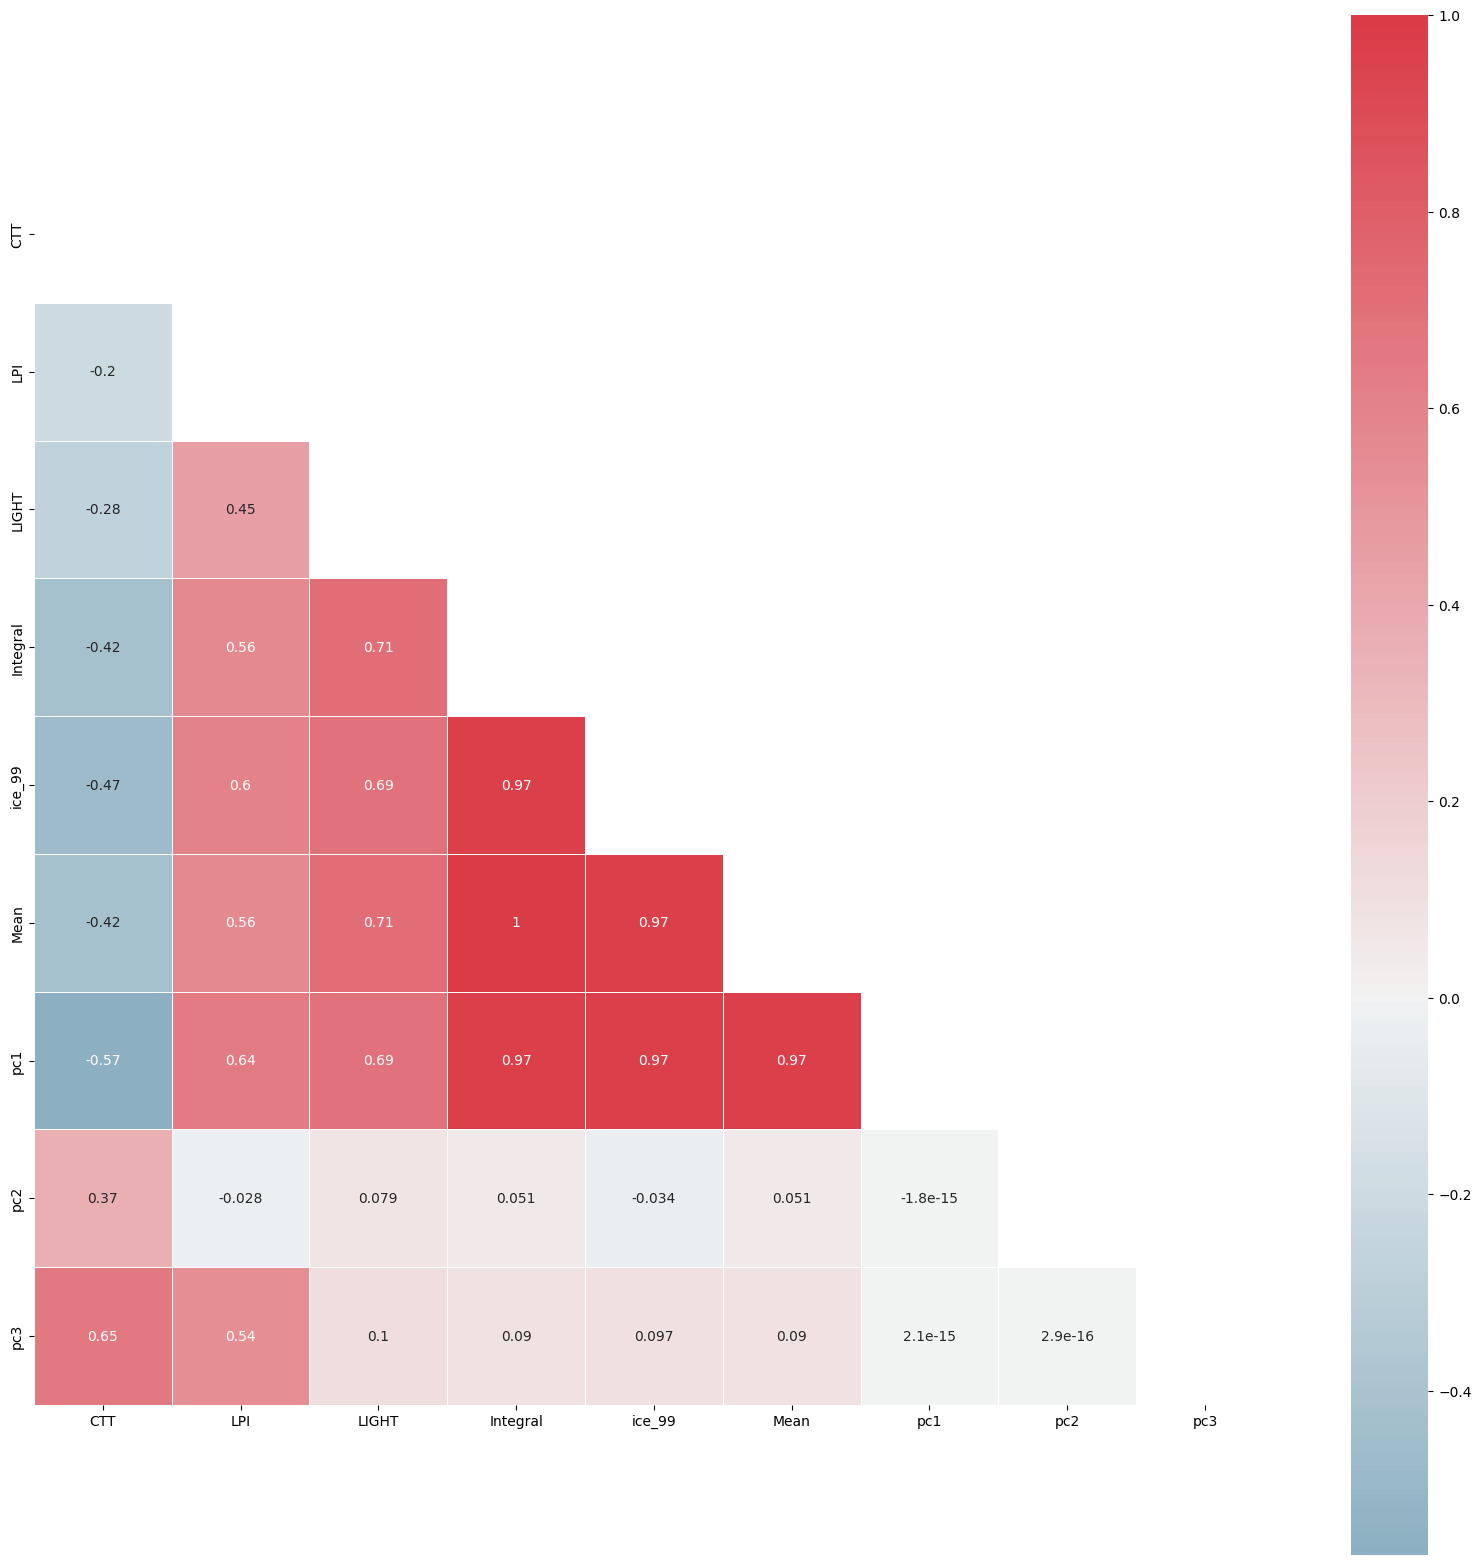

In [ ]:
df_corr_pca1 = final_df[['CTT', "LPI", 'LIGHT', 'Integral', "ice_99",'Mean',"pc1", "pc2", "pc3"]].copy()

mask = np.triu(np.ones_like(df_corr_pca1.corr(), dtype=bool))

f, ax = plt.subplots(figsize=(20, 20))

cmap = sns.diverging_palette(230, 10, as_cmap=True)

sns.heatmap(df_corr_pca1.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True) # no estan muy correlacionadas puedo usarlas todas

Y podemos graficar en un gráfico de barras, cuál es la varianza explicada por cada uno de los componentes de nuestro PCA.

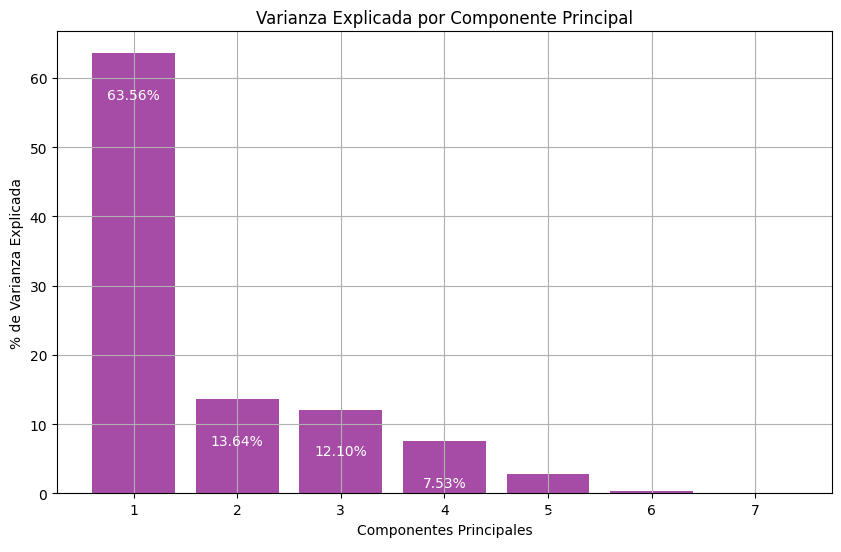

In [ ]:
varianza_explicada = pca.explained_variance_ratio_*100
num_componentes = len(varianza_explicada)
ejes_x = np.arange(1, num_componentes + 1) ## 1 2 3 etc

plt.figure(figsize=(10, 6))
bars = plt.bar(ejes_x, varianza_explicada, color='purple', alpha=0.7)

# Add labels inside each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval - 5, f'{yval:.2f}%', ha='center', va='top', color='white')

plt.xlabel('Componentes Principales')
plt.ylabel('% de Varianza Explicada')
plt.title('Varianza Explicada por Componente Principal')

plt.xticks(ejes_x)
plt.grid(True)
plt.show()


### ANALIZANDO LOS COMPONENTES PRINCIPALES Y LA CORRELACIÓN ENTRE LAS VARIABLES.
Con el objetivo de reducir la dimensionalidad de las variables explicatorias a usar en los modelos que implementaremos más adelante, realizamos la tecnica de ordenamiento PCA, sin limite de componentes, es decir que podía generar tantos componentes principales como variables tengamos. Como resultado vemos que los tres primeros componentes principales (ejes pc1, pc2 , pc3) explican el 89.3%, con lo cual sería razonable utilizar estos ejes en lugar de las variables originales, con el costo de perder la posibilidad de evaluar el efecto individual de cada variable.
Por otra parte vemos que hay una fuerte correlacion lineal entre el pc1 (que explica el aprox el 60% de la variación) y la sumatoria del hielo en todos los niveles (Integral) y con el percentil 99 de la columna (ice_99) , además de una fuerte correlación entre ambas variables mencionadas. Esto nos dice que el efecto en el ordenamiento y en la variacion total del eje 1 esta explicado principalmente por la cantidad de hielo. Además si usaramos las variables originales probablemente tengamos que elegir entre la sumatoria y el ice_99.  

Por último, podemos plotear los componentes principales en los ejes, en primer lugar PC1 vs PC2 y luego en 3 ejes sumando a PC3, para observar la direccion de los mismos y la separación que producen de acuerdo a la variable "LIGHT", si es que la hay.

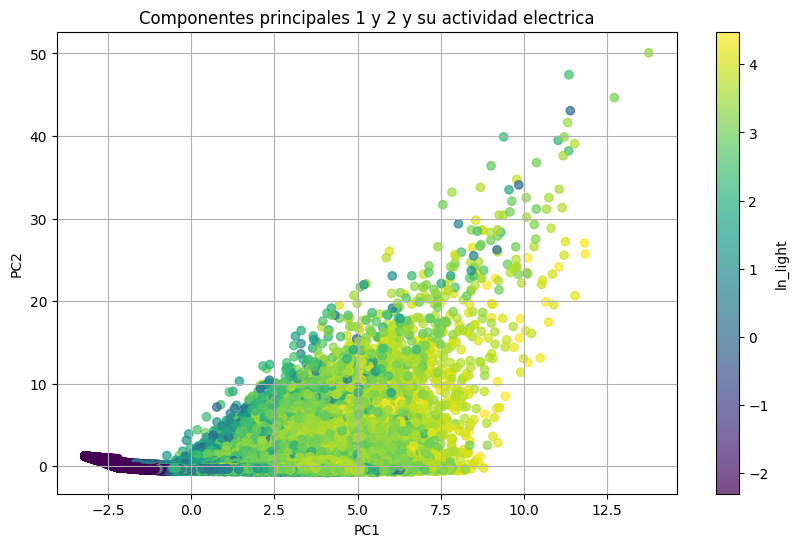

In [ ]:
components = pipeline.fit_transform(X)
pc1 = components[:, 0]
pc2 = components[:, 1]

ln_light = _df_tp2_final['ln_LIGHT']
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pc1, pc2, c=ln_light, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='ln_light')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Componentes principales 1 y 2 y su actividad electrica')
plt.grid(True)


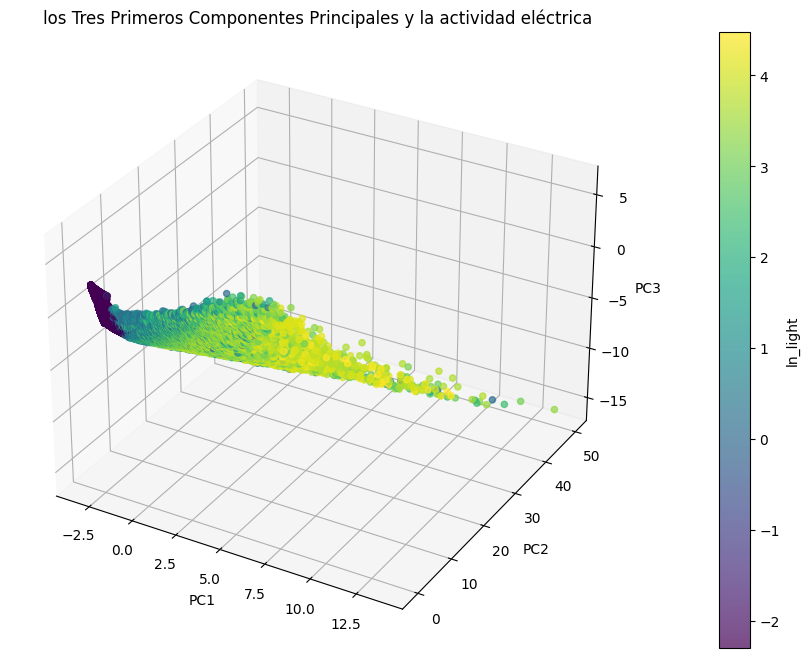

In [ ]:
## con 3 ejes
pc1 = components[:, 0]
pc2 = components[:, 1]
pc3 = components[:, 2]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d') ## para 3d

scatter = ax.scatter(pc1, pc2, pc3, c=ln_light, cmap='viridis', alpha=0.7)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('los Tres Primeros Componentes Principales y la actividad eléctrica')
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('ln_light')
plt.show()


A modo general vemos que el mayor efecto en la separación de los puntos se observa en la variación del PC1 como ya habiamos explicado (aprox explica el 60% de la variación) y a su vez vemos que seria la que mayor efecto tiene en la actividad electrica ( los puntos amarillos se encuentran mayormente a la derecha del pc1 y los mas oscuros a la izquierda). Por otra parte cabe destacar que los puntos con actividad electrica nula (puntos violetas) no se diferencian en función de estos ejes (y por lo tanto en las variables que mas explican estos ejes) ya que todos los puntos estan muy juntos en el espacio (apenas se separan en función del pc1, pero no vertiacalemente con respecto al pc2).

## Trabajo Práctico N°3

###Consignas


1. Luego del preprocesamiento del dataset, definimos nuestro dataset "final". Con este dataset comenzaremos a entrenar nuestros modelos, comenzando por el más sencillo para establecerlo como baseline y luego yendo hacia otros más complejos.

2. Como se habrán dado cuenta, nuestro problema es un problema de aprendizaje supervisado y podemos abordarlo como un problema de clasificacion o un problema de regresión. La idea es que trabajen ambas opciones implementando inicialmente algún modelo lineal sencillo para cada caso. No se olviden de normalizar las variables si el modelo lo requiere. Evaluen las metricas en cada caso.

3. En el problema de regresion, evaluen la performance del modelo lineal si modifican el valor de la columna target por su logaritmo (new_target --> ln(target)). Primero apliquen ln y despues normalicen.

4. Quedandonos solamente con el problema de regresión, implementen modelos de mayor complejidad como Random Forest y haciendo uso de GridSearchCV busquen los hiperparametros que optimizan el modelo. Evaluen la relevancia de cada una de las variables que han empleado como entrada y analicen los resultados obtenidos.  

5. Ahora implementen para el mismo dataset, redes neuronales y busquen también optimizar sus hiperparametros.

6. Se les proveerá un nuevo dataset, el cuál servirá para testear los modelos desarrollados en los puntos 4 y 5. Apliquen los modelos a este nuevo dataset y comparen las métricas.

** En cualquier momento pueden modificar el dataset, reduciendo el numero de variables de entrada si les parece lo mejor**

###Desarrollo

In [ ]:
_df_tp2_final

,CTT,LPI,MDBZ,LIGHT,Integral,ice_99,ice_25,Mean,ln_LIGHT
0,219.47990417480468750000,1.95278000831604003906,35.44601058959960937500,2.00000000000000000000,0.02109048305592762379,0.00380917995003977753,0.00000000000000000000,0.00052726207639819064,0.74193734472937733493
1,302.75625610351562500000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000367293914864,0.00000000096903490732,0.00000000000000000000,0.00000000009182347872,-2.30258509299404545700
2,220.60833740234372157829,19.96059417724609375000,37.21746063232421875000,1.00000000000000000000,0.02047383652150829014,0.00337354725459585629,0.00000000000000000000,0.00051184591303770721,0.09531017980432493486
3,302.79589843750000000000,0.00000000000000000000,0.00000000000000000000,0.00000000000000000000,0.00000000363935909912,0.00000000094417917762,0.00000000000000000000,0.00000000009098397748,-2.30258509299404545700
4,217.20233154296875000000,30.20295524597167968750,40.34687805175781250000,2.00000000000000000000,0.02539323600462160130,0.00421282108873126653,0.00000000000000000000,0.00063483090011554001,0.74193734472937733493
...,...,...,...,...,...,...,...,...,...
499995,204.10980224609372157829,0.00035693598329079998,28.23823356628417968750,0.00000000000000000000,0.00935565876268758256,0.00161636821925631707,0.00000000000000000000,0.00023389146906718956,-2.30258509299404545700
499996,202.18196105957031250000,0.78947567939758300781,47.70378875732421875000,11.00000000000000000000,0.07986319173323512544,0.00607572611421341741,0.00000062298865088906,0.00199657979333087805,2.40694510831828845099
499997,203.94747924804687500000,0.00031268605380310000,28.23842811584472656250,0.00000000000000000000,0.00936307865386316884,0.00157633155002252605,0.00000000000000000000,0.00023407696634657923,-2.30258509299404545700
499998,203.65419006347656250000,0.01743775978684420150,47.86922836303710937500,3.00000000000000000000,0.08257207332214884510,0.00658094128593801446,0.00000101525924378620,0.00206430183305372121,1.13140211149110059274


#Modelo de Clasificación para la actividad electrica
Se realizó un modelo simple (una regresión logística) para predecir la presencia y ausencia de actividad electrica
Variable respuesta = Light binaria (1 presencia de actividad, 0 ausencia)
predictoras elegidas = Integral del hielo por columna de dominio, CTT, LPI, MDBZ

In [ ]:
 ## primero creamos la variable

y = np.where(_df_tp2_final['LIGHT'] > 0, 1, 0)
X = _df_tp2_final[['CTT','LPI', 'MDBZ', 'Integral']]
## dividimos el set de datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
## trabajamos con pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Estandarización
    ('lr', LogisticRegression())  # vot a usar gradient boost
])

## ajustamos el modelo
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression())])

              precision    recall  f1-score   support

           0       0.96      0.97      0.97    198337
           1       0.97      0.96      0.97    201663

    accuracy                           0.97    400000
   macro avg       0.97      0.97      0.97    400000
weighted avg       0.97      0.97      0.97    400000

              precision    recall  f1-score   support

           0       0.96      0.97      0.97     49480
           1       0.97      0.96      0.97     50520

    accuracy                           0.97    100000
   macro avg       0.97      0.97      0.97    100000
weighted avg       0.97      0.97      0.97    100000



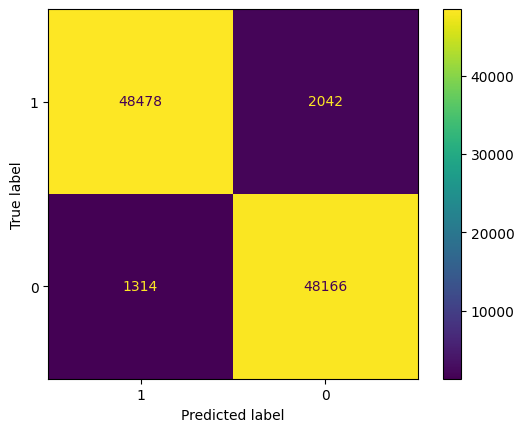

In [ ]:
## metricas
y_pred = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)
print(classification_report(y_train, y_pred))
print(classification_report(y_test, y_pred_test))
## matriz de confusión
cm = confusion_matrix(y_test,y_pred_test, labels = [1,0])

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels = np.array([1,0]))
disp.plot()

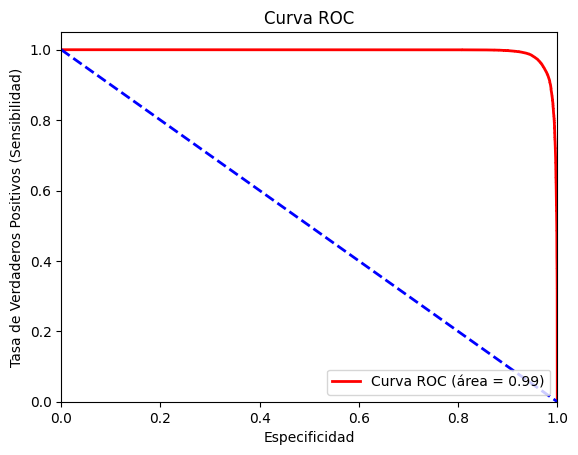

In [ ]:
## ROC y AUC score
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)
specificity = 1 - fpr
plt.figure()
plt.plot(tpr, specificity, color='red', lw=2, label=f'Curva ROC (área = {auc_score:.2f})')
plt.plot([0, 1], [1, 0], color='blue', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Especificidad')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

En general vemos que casi no hay problemas para predecir la presencia  y ausencia de actividad electrica. Es un muy buen modelo predictivo ya que el área bajo la curva de la curva ROC da 0.99. La matriz de confución nos muestra que hay muy poco error tanto para predecir 0s como 1s (hay pocos falsos positivos y pocos falsos negativos), además no hay un desbalance en el error para predecir los 1s y 0s, es decir no tiene más problemas con una etiqueta que con la otra (precisión, recall y f1score para ambas etiquetas son muy similares y muy altos). El accuracy score es de 0.97. Es decir que solo erra el 3 por ciento de las prediccicones en el test.
**Conclusión**: el modelo funciona bien para predecir la presencia y ausencia de actividad electrica

#Regresión lineal para la actividad electrica
A continuación se ajusta un modelo lineal simple para definir una baseline de trabajo.

In [ ]:
X = _df_tp2_final[['CTT','LPI', 'MDBZ', 'Integral']]
y = _df_tp2_final['ln_LIGHT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Estandarización
    ('lr', LinearRegression())
])


In [ ]:
## ajuste del modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [ ]:
# metricas

y_pred = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

train_error = mean_squared_error(y_train, y_pred) ### el error para los datos de entrenamiento
test_error = mean_squared_error(y_test, y_pred_test)
print(f'El error cuadrático medio en el entrenamiento fue {train_error}')
print(f'El error cuadrático medio en el test fue {test_error}')

r2_train = r2_score(y_train, y_pred)
r2_test = r2_score(y_test, y_pred_test)
print(f'El R2 fue {r2_train}')
print(f'El R2 fue {r2_test}')



El error cuadrático medio en el entrenamiento fue 1.1967439330197684
El error cuadrático medio en el test fue 1.1947355230000387
El R2 fue 0.803259287918115
El R2 fue 0.8031075965615277


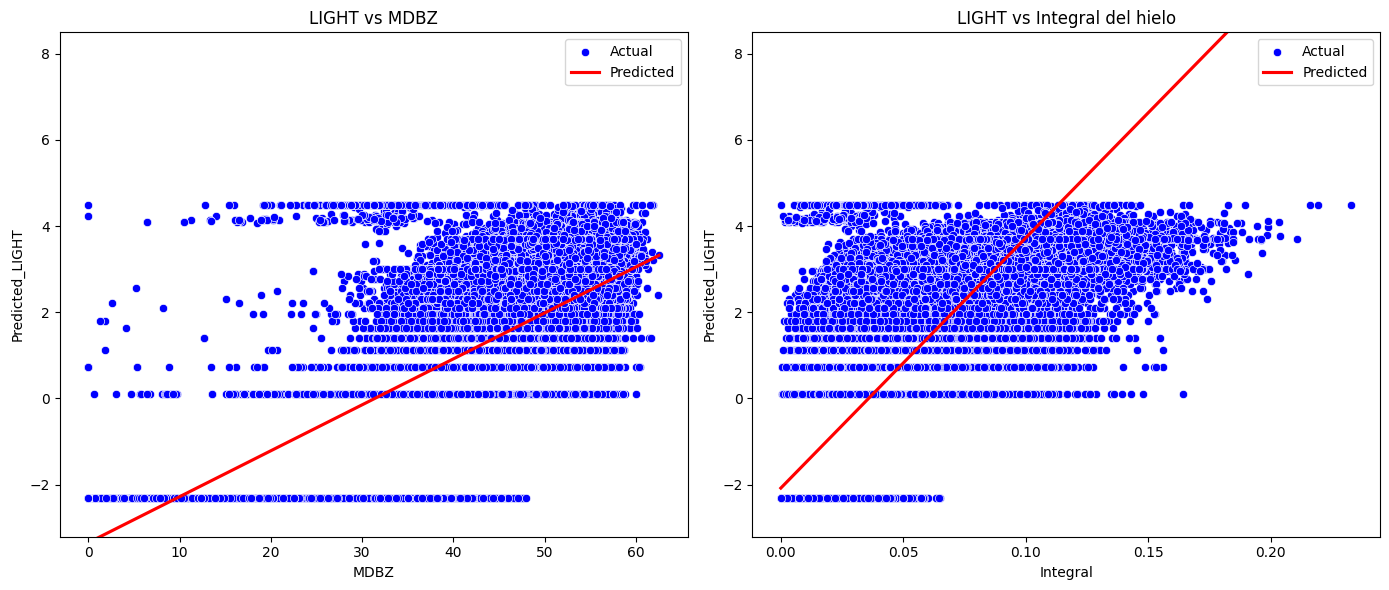

In [ ]:
results = X_test.copy()
results['ln_LIGHT'] = y_test
results['Predicted_LIGHT'] = y_pred_test
min_value = min(results['ln_LIGHT'].min(), results['Predicted_LIGHT'].min())
max_value = max(results['ln_LIGHT'].max(), results['Predicted_LIGHT'].max())
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(ax=axes[0], data=results, x='MDBZ', y='ln_LIGHT', color='blue', label='Actual')
sns.regplot(ax=axes[0], data=results, x='MDBZ', y='Predicted_LIGHT', scatter=False, color='red', label='Predicted')
axes[0].set_ylim(min_value, max_value)
axes[0].set_title('LIGHT vs MDBZ')
axes[0].legend()

# Gráfico para integral
sns.scatterplot(ax=axes[1], data=results, x='Integral', y='ln_LIGHT', color='blue', label='Actual')
sns.regplot(ax=axes[1], data=results, x='Integral', y='Predicted_LIGHT', scatter=False, color='red', label='Predicted')
axes[1].set_ylim(min_value, max_value)
axes[1].set_title('LIGHT vs Integral del hielo')
axes[1].legend()

# Mostrar los gráficos

plt.tight_layout()
plt.show()

In [ ]:
results[results['Predicted_LIGHT'] == max(results['Predicted_LIGHT'])]
results[results['MDBZ'] == max(results['MDBZ'])]

,CTT,LPI,MDBZ,Integral,ln_LIGHT,Predicted_LIGHT
50096,205.33021545410159092171,33.97095489501953125000,62.52556991577149148043,0.10160014484897400555,3.33576957633969994887,4.02246242043674051558


Si bien la grafica no muestra un buen ajuste, ya que es un modelo lineal, parece capturar la tendencia en la relación con las variable. Por otra parte muestra de base un r2 alto 0.8 , es decir que el modelo esta explicando un 80 por ciento de la variación en la actividad electrica incluso en el test.
El modelo no parece estar sobre ajustado.

# Random Forest para predecir la actividad electrica
Primero se realizará un random forest por defecto para compararlo con modelo donde se ajusten los hiperparámetros. Dado el tiempo que insume aplicar gridsearch, dicho método fue aplicado una sóla vez con ciertos hiperparámetros y luego realizamos algunas corridas de forma manual para probar otras combinaciones.



Para luego comparar graficamente, creamos una lista para almacenar las métricas

In [ ]:
_metricas = []

1) Primera iteración : sin ajuste de hiperparámetros.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
## random forest por defecto
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Estandarización
    ('rf', RandomForestRegressor(n_jobs = -1, random_state = 42))
])

pipeline.fit(X_train,y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [ ]:
y_pred_1 = pipeline.predict(X_train)
y_pred_test_1 = pipeline.predict(X_test)


In [ ]:
train_error_1 = mean_squared_error(y_train, y_pred_1)
test_error_1 = mean_squared_error(y_test, y_pred_test_1)
print(f'El error cuadratico medio en el entrenamiento fue {train_error_1}')
print(f'El error cuadratico medio en el test fue {test_error_1}')
r2_train_1 = r2_score(y_train, y_pred_1)
r2_test_1 = r2_score(y_test, y_pred_test_1)
print(f'El R2 en entrenamiento fue {r2_train_1}')
print(f'El R2 en test fue {r2_test_1}')

El error cuadratico medio en el entrenamiento fue 0.08170971209473239
El error cuadratico medio en el test fue 0.5908422822564033
El R2 en entrenamiento fue 0.9865671957901976
El R2 en test fue 0.9026291972013862


In [ ]:
_metricas.append(("train_error_1", train_error_1))
_metricas.append(("test_error_1", test_error_1))
_metricas.append(("r2_train_1", r2_train_1))
_metricas.append(("r2_test_1", r2_test_1))

El modelo base parece tener un buen rendimiento pero aparentemente sobreajusta en el entrenamiento. El r2 cae bastante y sobre todo nos muestra que en el entrenamiento es muy alto 0.98.
En este sentido se realizó una prueba de hiperparametros utilizando validación cruzada con 5 folds, implementado con GridSearchCV.    
Los valores de los hieperparametros testeados fueron los siguientes:    

- n_estimators: [100, 200]   
Este hiperparametro especifica cuántos árboles de decisión se deben entrenar en el modelo. Más árboles generalmente ayudan a reducir el riesgo de overfitting (ajuste excesivo), ya que combinan muchas decisiones individuales de árboles

- max_depth: [5, 10, 16]   
 Define la profundidad máxima permitida para cada árbol de decisión en el modelo Random Forest. si la profundidad es excesiva, puede llevar a overfitting

- min_samples_split: [1, 2, 5]   
 Define el número mínimo de muestras que debe tener un nodo para poder ser dividido en el proceso de construcción del árbol. Valroes muy bajos permiten árboles muy detallados lo que puede llevar a overfitting   

- min_samples_leaf: [1, 2, 5]    
Define el número mínimo de muestras que debe tener una hoja (nodo terminal) en el árbol de decisión. Valores bajos permite que las hojas tengan muy pocas muestras, lo que puede resultar en árboles muy detallados y específicos. Esto puede llevar a overfitting

- max_features: [0.5, 1.0]    
Controla cuántas características se consideran al realizar cada división en cada árbol de decisión del bosque. Con valores bajos cada árbol estará menos correlacionado con los demás árboles, promoviendo la diversidad entre los árboles, reduciendo el riesgo de overfitting.    

La medida para seleccion del mejor modelo fue el negativo de la raiz cuadrada del error cuadrático medio.   
El Código utilizado fue el siguiente que por razones de tiempo de corrida no se colocará en el colab.
```
param_grid = {
    'rf__n_estimators': [100, 200],  # Number of trees (increased range)
    'rf__max_depth': [5, 10, 16],  # Maximum depth of the trees (including None for no limit)
    'rf__min_samples_split': [1, 2, 5],  # Minimum number of samples required to split a node
    'rf__min_samples_leaf': [1, 2, 5],  # Minimum number of samples required at a leaf node
    'rf__max_features': [0.5, 1.0],  # Number of features to consider for each split  # Criterion to measure quality of splits
}
grid_search = GridSearchCV(
    estimator = pipeline,
    param_grid = param_grid,
    scoring = 'neg_root_mean_squared_error',
    cv=5
)
grid_search.fit(X_train, y_train)
```
El modelo seleccionado fue {'rf__max_depth': 16, 'rf__max_features': 0.5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}


2) Segunda iteración con resultado de Gridsearch: {'rf__max_depth': 16, 'rf__max_features': 0.5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}

In [ ]:
pipeline_1 = Pipeline([
    ('scaler', StandardScaler()),  # Estandarización
    ('rf', RandomForestRegressor(n_jobs = -1, random_state = 42))
])
best_params = {'rf__max_depth': 16, 'rf__max_features': 0.5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}

In [ ]:
pipeline_1.set_params(**best_params)
pipeline_1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=16, max_features=0.5,
                                       n_estimators=200, n_jobs=-1,
                                       random_state=42))])

In [ ]:
y_pred_2 = pipeline_1.predict(X_train)
y_pred_test_2 = pipeline_1.predict(X_test)

In [ ]:
train_error_2 = mean_squared_error(y_train, y_pred_2)
test_error_2 = mean_squared_error(y_test, y_pred_test_2)
print(f'El error cuadratico medio en el entrenamiento fue {train_error_2}')
print(f'El error cuadratico medio en el test fue {test_error_2}')
r2_train_2 = r2_score(y_train, y_pred_2)
r2_test_2 = r2_score(y_test, y_pred_test_2)
print(f'El R2 en entrenamiento fue {r2_train_2}')
print(f'El R2 en test fue {r2_test_2}')

El error cuadratico medio en el entrenamiento fue 0.4200056878618539
El error cuadratico medio en el test fue 0.6209007881495859
El R2 en entrenamiento fue 0.930952465411815
El R2 en test fue 0.897675555700699


In [ ]:
_metricas.append(("train_error_2", train_error_2))
_metricas.append(("test_error_2", test_error_2))
_metricas.append(("r2_train_2", r2_train_2))
_metricas.append(("r2_test_2", r2_test_2))

Podemos observar en esta corrida, que el sobreajuste disminuye drásticamente, aunque aumenta el error cuadrático medio tanto en entrenamiento como en test. Sim embargo, el error en el conjunto de test no aumenta en gran medida, en relación con la primera iteración sin ajuste. Si aumenta considerablemente el error en el conjunto de entrenamiento, pero debemos tener en cuenta que ese modelo tiene sobreajuste.
En la siguiente iteración, probramos aumentando los hiperparámetros de profundidad del árbol y el número mínimo de muestras.

3) Tercera iteración: {'rf__max_depth': 50, 'rf__max_features': 0.5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 500, 'rf__n_estimators': 200}

In [ ]:
params_1 = {'rf__max_depth': 50, 'rf__max_features': 0.5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 500, 'rf__n_estimators': 200}

In [ ]:
pipeline_1.set_params(**params_1)
pipeline_1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=50, max_features=0.5,
                                       min_samples_split=500, n_estimators=200,
                                       n_jobs=-1, random_state=42))])

In [ ]:
y_pred_3 = pipeline_1.predict(X_train)
y_pred_test_3 = pipeline_1.predict(X_test)

In [ ]:
train_error_3 = mean_squared_error(y_train, y_pred_3)
test_error_3 = mean_squared_error(y_test, y_pred_test_3)
print(f'El error cuadratico medio en el entrenamiento fue {train_error_3}')
print(f'El error cuadratico medio en el test fue {test_error_3}')
r2_train_3 = r2_score(y_train, y_pred_3)
r2_test_3 = r2_score(y_test, y_pred_test_3)
print(f'El R2 en entrenamiento fue {r2_train_3}')
print(f'El R2 en test fue {r2_test_3}')

El error cuadratico medio en el entrenamiento fue 0.6506082548463986
El error cuadratico medio en el test fue 0.6827631004508646
El R2 en entrenamiento fue 0.8930421723368631
El R2 en test fue 0.8874806471901736


In [ ]:
_metricas.append(("train_error_3", train_error_3))
_metricas.append(("test_error_3", test_error_3))
_metricas.append(("r2_train_3", r2_train_3))
_metricas.append(("r2_test_3", r2_test_3))

Con esta tercera iteración disminuimos más aún el sobreajuste y el error aumenta minimamente.

> Add blockquote



4) Cuarta iteración: {'rf__max_depth': 100, 'rf__max_features': 0.5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 1000, 'rf__n_estimators': 200}

In [ ]:
params_2 = {'rf__max_depth': 100, 'rf__max_features': 0.5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 1000, 'rf__n_estimators': 200}

In [ ]:
pipeline_1.set_params(**params_2)
pipeline_1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=100, max_features=0.5,
                                       min_samples_split=1000, n_estimators=200,
                                       n_jobs=-1, random_state=42))])

In [ ]:
y_pred_4 = pipeline_1.predict(X_train)
y_pred_test_4 = pipeline_1.predict(X_test)

In [ ]:
train_error_4 = mean_squared_error(y_train, y_pred_4)
test_error_4 = mean_squared_error(y_test, y_pred_test_4)
print(f'El error cuadratico medio en el entrenamiento fue {train_error_4}')
print(f'El error cuadratico medio en el test fue {test_error_4}')
r2_train_4 = r2_score(y_train, y_pred_4)
r2_test_4 = r2_score(y_test, y_pred_test_4)
print(f'El R2 en entrenamiento fue {r2_train_4}')
print(f'El R2 en test fue {r2_test_4}')

El error cuadratico medio en el entrenamiento fue 0.6793254422818338
El error cuadratico medio en el test fue 0.6983880234103309
El R2 en entrenamiento fue 0.8883211624790733
El R2 en test fue 0.8849056600270689


In [ ]:
_metricas.append(("train_error_4", train_error_4))
_metricas.append(("test_error_4", test_error_4))
_metricas.append(("r2_train_4", r2_train_4))
_metricas.append(("r2_test_4", r2_test_4))

5) Quinta iteración: {'rf__max_depth': 35, 'rf__max_features': 0.5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 100, 'rf__n_estimators': 200}

In [ ]:
params_3 = {'rf__max_depth': 35, 'rf__max_features': 0.5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 100, 'rf__n_estimators': 200}

In [ ]:
pipeline_1.set_params(**params_3)
pipeline_1.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=35, max_features=0.5,
                                       min_samples_split=100, n_estimators=200,
                                       n_jobs=-1, random_state=42))])

In [ ]:
y_pred_5 = pipeline_1.predict(X_train)
y_pred_test_5 = pipeline_1.predict(X_test)

In [ ]:
train_error_5 = mean_squared_error(y_train, y_pred_5) ### el error para los datos de entrenamiento
test_error_5 = mean_squared_error(y_test, y_pred_test_5)
print(f'El error cuadratico medio en el entrenamiento fue {train_error_5}')
print(f'El error cuadratico medio en el test fue {test_error_5}')
r2_train_5 = r2_score(y_train, y_pred_5)
r2_test_5 = r2_score(y_test, y_pred_test_5)
print(f'El R2 en entrenamiento fue {r2_train_5}')
print(f'El R2 en test fue {r2_test_5}')

El error cuadratico medio en el entrenamiento fue 0.5346680088168423
El error cuadratico medio en el test fue 0.6448025693436353
El R2 en entrenamiento fue 0.9121023621848672
El R2 en test fue 0.8937365423750221


In [ ]:
_metricas.append(("train_error_5", train_error_5))
_metricas.append(("test_error_5", test_error_5))
_metricas.append(("r2_train_5", r2_train_5))
_metricas.append(("r2_test_5", r2_test_5))

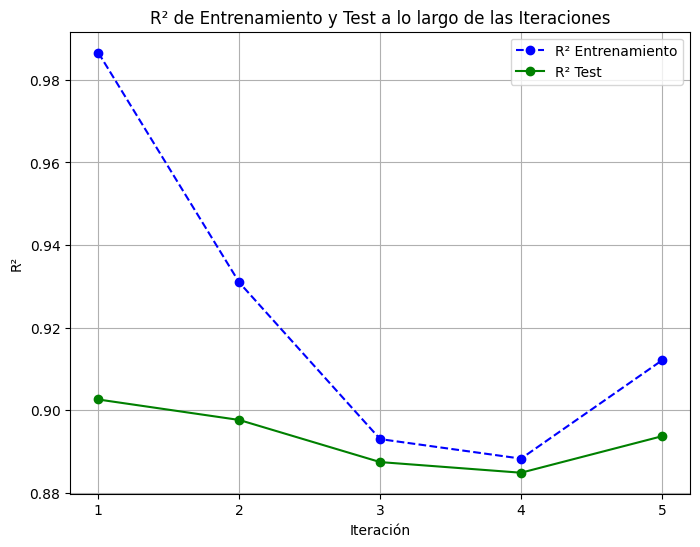

In [ ]:
r2_train = [metric[1] for metric in _metricas if 'r2_train' in metric[0]]
r2_test = [metric[1] for metric in _metricas if 'r2_test' in metric[0]]

iterations = range(1, 6)

plt.figure(figsize=(8, 6))
plt.plot(iterations, r2_train, label='R² Entrenamiento', marker='o', linestyle='--', color='b')
plt.plot(iterations, r2_test, label='R² Test', marker='o', linestyle='-', color='g')

plt.xlabel('Iteración')
plt.ylabel('R²')
plt.title('R² de Entrenamiento y Test a lo largo de las Iteraciones')
plt.xticks(iterations)
plt.legend()
plt.grid(True)
plt.show()


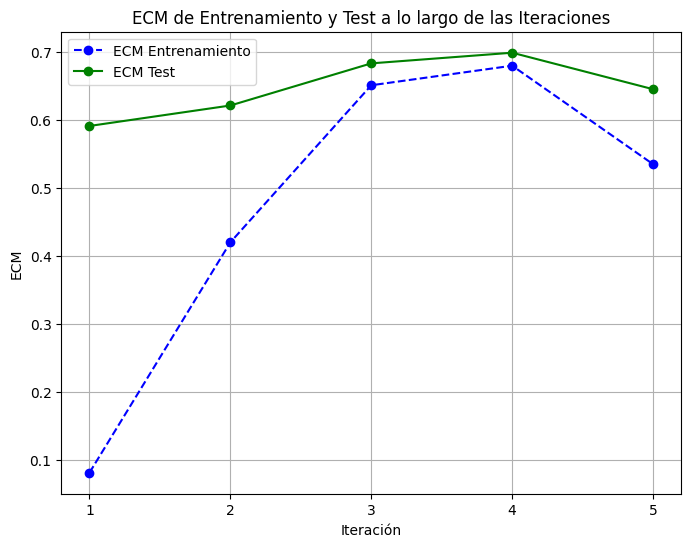

In [ ]:
r2_train = [metric[1] for metric in _metricas if 'train_error' in metric[0]]
r2_test = [metric[1] for metric in _metricas if 'test_error' in metric[0]]

iterations = range(1, 6)

plt.figure(figsize=(8, 6))
plt.plot(iterations, r2_train, label='ECM Entrenamiento', marker='o', linestyle='--', color='b')
plt.plot(iterations, r2_test, label='ECM Test', marker='o', linestyle='-', color='g')

plt.xlabel('Iteración')
plt.ylabel('ECM')
plt.title('ECM de Entrenamiento y Test a lo largo de las Iteraciones')
plt.xticks(iterations)
plt.legend()
plt.grid(True)
plt.show()

Haciendo un análisis de las métricas y un análisis visual, tanto del error cuadrátrico medio como del R2, podemos ver que en la iteración número 4, en la cuál trabajamos con una profundidad máxima de 100 y un mínimo de muestras de 1000, obtenemos la menor diferencia entre el R2 del conjunto de entrenamiento y de test, con lo cuál reducimos el overfitting inicial, y en términos del error, si bien aumenta considereablemente para el conjunto de entrenamiento (consecuencia de eliminar el overfitting), no aumenta demasiado para el conjunto de test. Además, dado que con este modelo buscamos generalizar y predecir nuevos valores, encontramos más importante disminuir el sobreajuste, tener un modelo que generalice bien, y no enfocarnos tanto en el error.

## Inspección del modelo:
A continuación, analizamos la importancia de las variables utilizando la técnica de importancia por permutación. Esta técnica de inspección evalúa la relevancia de cada variable en la predicción al medir el incremento en la métrica seleccionada cuando se rompe la relación entre cada variable predictora y la variable de respuesta. El proceso se realiza de manera individual para cada variable y se calcula el impacto de su alteración (en cada permutación). En el contexto de la regresión, la métrica comúnmente utilizada es el error cuadrático medio (ECM). Nuestra implementación incluye 10 repeticiones para obtener variabilidad en el aumento del ECM para cada variable.

In [ ]:
# el modelo final es el de la iteración 4
params_final = {'rf__max_depth': 100, 'rf__max_features': 0.5, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 1000, 'rf__n_estimators': 200}
pipeline.set_params(**params_final)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=100, max_features=0.5,
                                       min_samples_split=1000, n_estimators=200,
                                       n_jobs=-1, random_state=42))])

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    pipeline, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

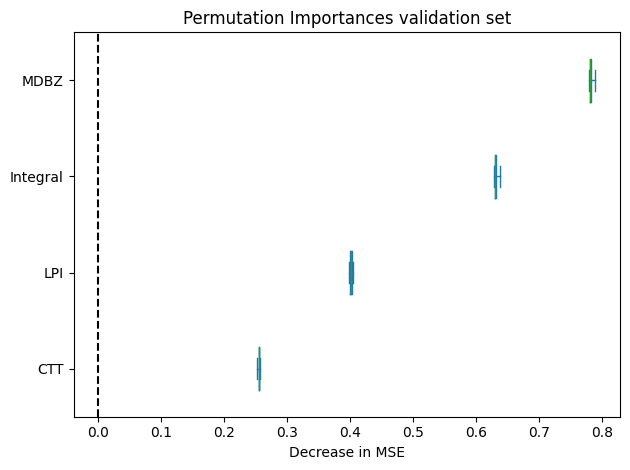

In [ ]:
sorted_importances_idx = result.importances_mean.argsort()

importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)

ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances validation set")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in MSE")
ax.figure.tight_layout()
plt.show()

Aquí se muestra cómo cambia el rendimiento del modelo al permutar cada característica varias veces (en este caso, 10 repeticiones) y medir el impacto en el error.
**Conclusión:** La variable más importante para predecir la magnitud de actividad electrica es la integral del hielo seguida de MDBZ, LPI y la de menor importancia fue CTT.

Acontinuación probamos entonces como funcionaría el modelo sin la variable CTT que fue la de menos importancia

In [ ]:
X = _df_tp2_final[['LPI', 'MDBZ', 'Integral']]
y = _df_tp2_final['ln_LIGHT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=100, max_features=0.5,
                                       min_samples_split=1000, n_estimators=200,
                                       n_jobs=-1, random_state=42))])

In [ ]:
y_preds = pipeline.predict(X_train)
y_preds_test = pipeline.predict(X_test)

train_error = mean_squared_error(y_train, y_preds) ### el error para los datos de entrenamiento
test_error = mean_squared_error(y_test, y_preds_test)
print(f'El error cuadratico medio en el entrenamiento fue {train_error}')
print(f'El error cuadratico medio en el test fue {test_error}')
r2_train = r2_score(y_train, y_preds)
r2_test = r2_score(y_test, y_preds_test)
print(f'El R2 en entrenamiento fue {r2_train}')
print(f'El R2 en test fue {r2_test}')

El error cuadratico medio en el entrenamiento fue 0.7260135653507268
El error cuadratico medio en el test fue 0.7457707123042925
El R2 en entrenamiento fue 0.8806457907266861
El R2 en test fue 0.8770969933237611


Tanto en el análisis de la importancia de las variables, como en el modelo RF sin la variable CTT,  vemos que CTT no sería tan importante para predecir. El R2 y el error cuadrático medio no cambian demasiado al utlizar el modelo sin CTT.    
Igualmente en la predicción en el testeo la vamos a utilizar .

## Predicción en el set de testeo
A continuación utilizamos este modelo para predecir en el set de testeo


In [ ]:
## cargamos el data set
file_id = '17HCBW6PaVdKczseviJrrUoNLwnc7U-t1'
destination = '/content/WRF_FILE_test.csv'

# Descargar el archivo usando gdown
!gdown $file_id -O $destination

# Lectura del archivo y almancenamiento en la variable df
_df_test = pd.read_csv(destination) ## para despues

Downloading...
From: https://drive.google.com/uc?id=17HCBW6PaVdKczseviJrrUoNLwnc7U-t1
To: /content/WRF_FILE_test.csv
100% 1.63M/1.63M [00:00<00:00, 143MB/s]


In [ ]:
_df_test.rename(columns={'INTICE':'Integral'},inplace=True)
_df_test['CTT'] = _df_test['CTT'] + 273.15
_df_test.loc[_df_test['LIGHT'] > 100, 'LIGHT'] = 100
_df_test.loc[_df_test['MDBZ'] < 0, 'MDBZ'] = 0
_df_test_ti = _df_test.copy() ### para usar luego
_df_test2 = _df_test[['CTT','LPI','MDBZ','Integral','LIGHT']]
_df_test2

,CTT,LPI,MDBZ,Integral,LIGHT
0,201.21320190429685226263,0.09561415227698470687,32.34644317626953125000,0.00180706440005450010,0.00000000000000000000
1,202.63899078369138351263,0.00761972826199349990,33.71897125244140625000,0.00208856118842949993,0.00000000000000000000
2,202.95073547363278976263,0.01083852669280209978,32.59632873535156250000,0.00147430354263629998,0.00000000000000000000
3,202.29938354492185226263,0.01865479857254119869,32.54309844970703125000,0.00121382239740339994,0.00000000000000000000
4,265.40708341598508468451,0.21226200084405530411,41.84715652465820312500,0.00016829640662759999,0.00000000000000000000
...,...,...,...,...,...
6897,214.18425979614255538763,8.84976906446594391298,37.72705078125000000000,0.00587512925267210002,3.00000000000000000000
6898,214.55023422241208663763,0.06315479571748079668,39.99996948242188210543,0.00561487441882489984,1.00000000000000000000
6899,265.93396701812741866888,0.04851966237112680103,30.65251922607421875000,0.00066012825118369999,0.00000000000000000000
6900,215.02756729125974288763,0.00013029854536369999,32.74670028686523437500,0.00175395153928540009,0.00000000000000000000


In [ ]:
X_ftest = _df_test2[['CTT','LPI', 'MDBZ', 'Integral']]
y_ftest = np.log(_df_test2['LIGHT'] + 0.1)

Previo a estimar estos nuevos datos, vamos a entrenar nuestro mejor modelo de Random Forest (iteración n°4) con todos los datos iniciales, tanto de train como de test, ya que ahora vamos a predecir con un nuevo conjunto de datos. Por ello, podemos usar el 100% de los datos iniciales, una vez que probamos y ajustamos los hiperparámetros.

In [ ]:
X = _df_tp2_final[['CTT','LPI', 'MDBZ', 'Integral']] ## rehacemos la  X
y = _df_tp2_final['ln_LIGHT']
pipeline.fit(X, y) ## se hace el reentreno con todos los datos del entrenamiento.

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestRegressor(max_depth=100, max_features=0.5,
                                       min_samples_split=1000, n_estimators=200,
                                       n_jobs=-1, random_state=42))])

In [ ]:
y_pred_ftest = pipeline.predict(X_ftest)

test_error = mean_squared_error(y_ftest, y_pred_ftest)
print(f'El error cuadratico medio en el test final fue {test_error}')
r2_ftest = r2_score(y_ftest, y_pred_ftest)
print(f'El R2 en test final fue {r2_ftest}')

El error cuadratico medio en el test final fue 2.540471286690764
El R2 en test final fue 0.5604959947707803


Acontinuación analizamos la distribución de la Actividad eléctrica predicha y de la estimado por el modelo WRF-ELEC

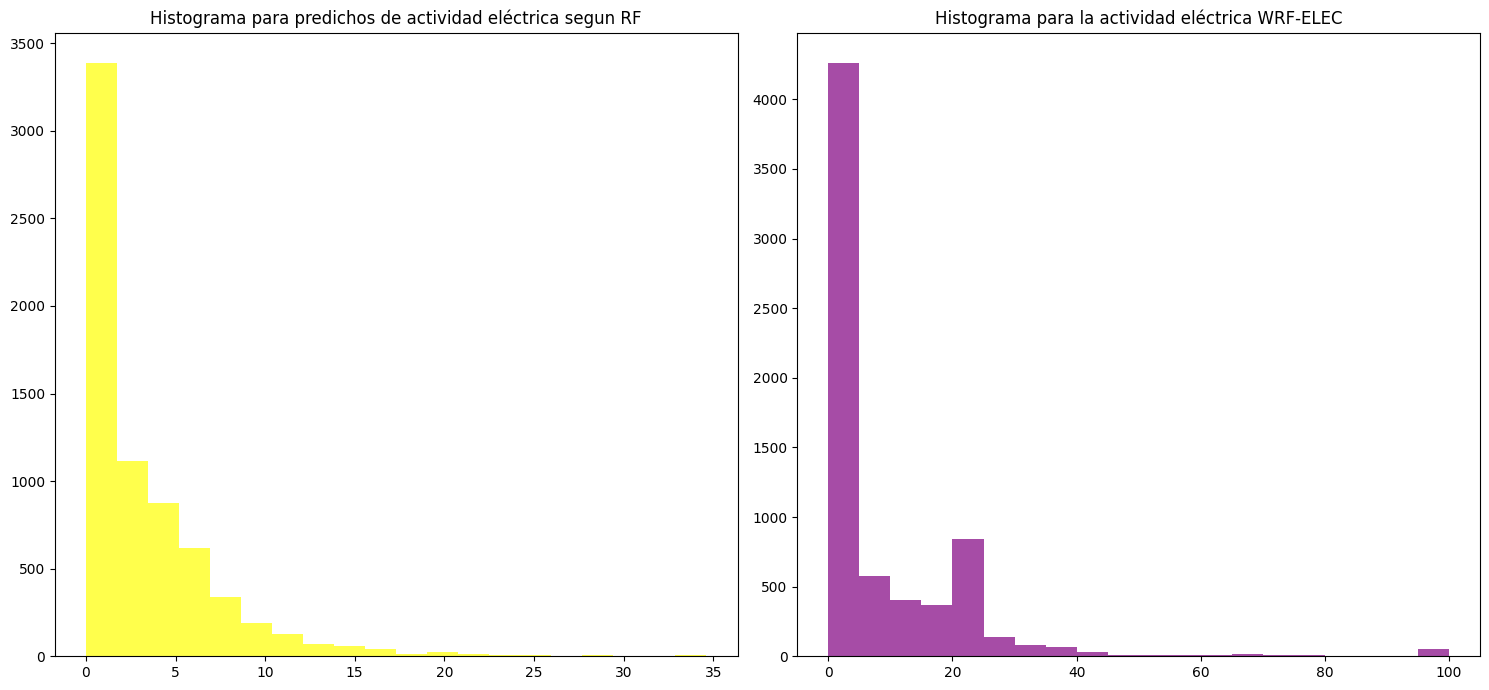

In [ ]:
LIGHT_pred = np.exp(y_pred_ftest)-0.1 ## vuelvo a la escala original
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(LIGHT_pred, bins=20, color='yellow', alpha=0.7)
axs[0].set_title('Histograma para predichos de actividad eléctrica segun RF')

axs[1].hist(_df_test['LIGHT'], bins=20, color='purple', alpha=0.7)
axs[1].set_title('Histograma para la actividad eléctrica WRF-ELEC')

plt.tight_layout()
plt.show()


Vemos que el Error cuadrático medio fue mucho más alto que en el entrenamiento y el r2 fue mucho más bajo, lo que indica que nuestro modelo no esta capturando correctamente la variabilidad de la actividad elétrica en este nuevo data set. Esto puede ser debido a que nuestro modelo original esta sobre ajustado o que faltan variables que pudiesen explicar mejor la variabilidad en la actividad electrica. Tambien, consideramos que puede haber discrepancias en la toma de los datos entre uno y otro. Analizaremos más adelante estas cuestiones en las conclusiones finales.
Por otra parte viendo las distribuciones de la variable AE predicha con respecto a la real, vemos que el modelo tiene problemas con las magnitudes , si bien estima relativamente bien los 0s, una vez que hay actividad electrica subestima la magnitud.  No estima ningun 100 y tiene mucha frecuencia entres el 2 y el 5. En el caso de la variable y real, el rango es muchu mas amplio con mucha frecuencia acumulada hasta cerca del 20.

##Prediciendo las columnas de dominio del intervalo de tiempo 5


In [ ]:
df_test_t5 = _df_test_ti[_df_test_ti['time'] == 5]
X_t5 = df_test_t5[['CTT','LPI', 'MDBZ', 'Integral']]
pred_t5 = pipeline.predict(X_t5)
LIGHT_predt5 = np.exp(pred_t5)-0.1 ## vuelvo a la escala de light original
df_test_t5['pred'] = LIGHT_predt5

y_ftest_t5 = np.log(df_test_t5['LIGHT'] + 0.1)
test_error = mean_squared_error(y_ftest_t5, pred_t5)
print(f'El error cuadratico medio en el test para el t5  fue {test_error}')
r2_ftest = r2_score(y_ftest_t5, pred_t5)
print(f'El R2 en test final para el t5 fue {r2_ftest}')

El error cuadratico medio en el test para el t5  fue 3.3277470789219734
El R2 en test final para el t5 fue 0.41934638443659766


<ipython-input-55-eaadabe83638>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_t5['pred'] = LIGHT_predt5


<ipython-input-54-3d64c5f5526e>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 0.1, 0.1])
<ipython-input-54-3d64c5f5526e>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0.1, 0.1, 0.1])


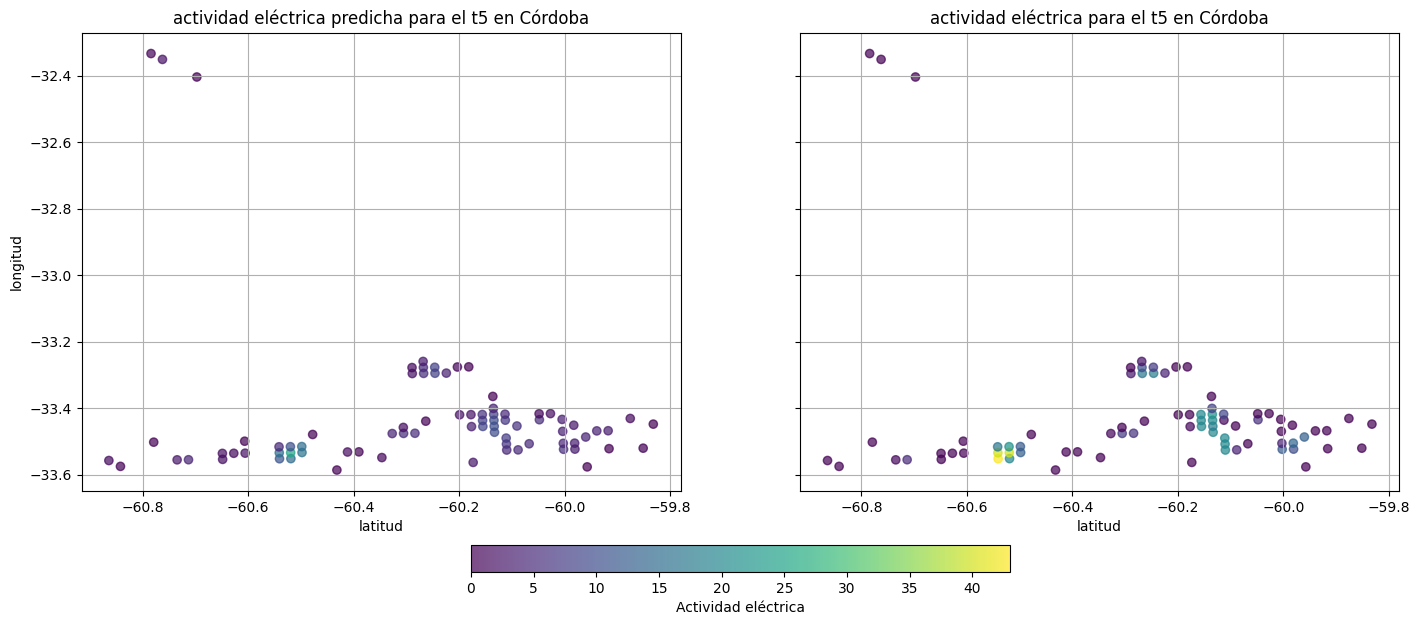

In [ ]:
vmin = min(df_test_t5['pred'].min(), df_test_t5['LIGHT'].min())
vmax = max(df_test_t5['pred'].max(), df_test_t5['LIGHT'].max())

fig, ax = plt.subplots(1, 2, figsize=(17, 7), sharex=True, sharey=True)

scatter1 = ax[0].scatter(df_test_t5['lons'], df_test_t5['lats'], c=df_test_t5['pred'], cmap='viridis', alpha=0.7, vmin=vmin, vmax=vmax)
ax[0].set_xlabel('latitud')
ax[0].set_ylabel('longitud')
ax[0].set_title('actividad eléctrica predicha para el t5 en Córdoba')
ax[0].grid(True)


scatter2 = ax[1].scatter(df_test_t5['lons'], df_test_t5['lats'], c=df_test_t5['LIGHT'], cmap='viridis', alpha=0.7, vmin=vmin, vmax=vmax)
ax[1].set_xlabel('latitud')
ax[1].set_title('actividad eléctrica para el t5 en Córdoba')
ax[1].grid(True)

# Crear una única colorbar fuera de los subplots
cbar = fig.colorbar(scatter1, ax=ax, orientation='horizontal', fraction=0.05, pad=0.1)
cbar.set_label('Actividad eléctrica')

# Ajustar layout
plt.tight_layout(rect=[0, 0.1, 0.1, 0.1])
plt.show()

Similar a lo analizado anteriormente, en el tiempo t5 el modelo random forest predice relativamente bien dónde hay y dónde no hay actividad eléctrica, pero cuando hay actividad eléctrica le erra en magnitud. Pareciera que la escala en los predichos está corrida hacia la izquierda.

# Implementación de Red Neuronal

Luego de haber implementado un modelo Random Forest, vamos a implementar una red neuronal para evaluar el rendimiento y compararlo con este primer modelo, para tener una alternativa.

Comenzamos definiendo nuevamente nuestras variables X e Y a partir del dataset final ya trabajado y hacemos el split en test y train.

In [ ]:
X = _df_tp2_final[['CTT','LPI', 'MDBZ', 'Integral']]
Y = _df_tp2_final['ln_LIGHT']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Luego, implementamos nuestro pipeline para ajustar el modelo correctamente, previamente standarizando las variables. Dado que el ajuste de una red neuronal consume mucho tiempo computacional, no realizaremos un gridsearch, sino que realizaremos un randomsearch, elijiendo especificamente un grupo de hiperparámetros a ajustar, y definiendo posibles valores que no impliquen un gran costo computaciones (pocas neuronas y capas).

Los hiperparámetros que iremos ajustando a lo largo de las distintas corridas son los siguientes:



*   **Hidden_layer_sizes** = implica la cantidad de capas ocultas de la neurona y la cantidad de neuronas dentro de cada una de estas capas. A mayor cantidad en cualquiera de los dos casos implica un mayor aprendizaje pero tambien un riesgo de sobreajuste.
*   **Activation** = se refiere al tipo de función utilizada para aprender las relaciones. Puede ser del tipo logistica, tangente hiperbóica, relu, etc. Esto afecta la velocidad del ajuste y los resultados.
*   **Solver** = algoritmo utilizado para la optimización de los pesos durante el entrenamiento. Puede utilizarse el algoritmo "adam" basado en el gradiente estocástico, "lbfgs" basado en métodos quasi-newton o "sgd" que se basa en el gradiente descendente estocástico.
*   **Alpha** = hiperparámetro para controlar el sobreajuste, penalizando los pesos.
*   **max_iter** = número máximo de iteraciones. Un número demasiado bajo puede generar que no se logre la convergencia y si es demasiado alto puede demorar el procesamiento.

Implementamos el pipeline y el Randomsearch. Vamos a probar con 3 iteraciones, y dando 3 posibilidades a cada uno de los hiperparámetros mencionados más arriba. Cómo métrica de decisión, por default, utilizamos el R2.

In [ ]:
#Definimos el pipeline.
pipeline_red = Pipeline([
    ('scaler', StandardScaler()),
    ('rn', MLPRegressor(random_state=42))
])

In [ ]:
#Definimos el pipeline.
pipeline_red = Pipeline([
    ('scaler', StandardScaler()),
    ('rn', MLPRegressor(random_state=42))
])

#Definimos los hiperparametros para el random search
param_distributions = {
    'rn__hidden_layer_sizes': [(10,10),(20,20),(30,30)],
    'rn__activation': ['relu', 'tanh','logistic'],
    'rn__solver': ['sgd', 'adam','lbfgs'],
    'rn__alpha': [1e-4, 1e-3, 1e-2],
    'rn__max_iter': [200,300,400]
}

#Creamos el randomsearch
random_search = RandomizedSearchCV(
    estimator=pipeline_red,
    param_distributions=param_distributions,
    n_iter=3,
    cv=3,
    random_state=42,
    n_jobs=-1
)

#Ajustamos el randomsearch
random_search.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rn',
                                              MLPRegressor(random_state=42))]),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'rn__activation': ['relu', 'tanh',
                                                           'logistic'],
                                        'rn__alpha': [0.0001, 0.001, 0.01],
                                        'rn__hidden_layer_sizes': [(10, 10),
                                                                   (20, 20),
                                                                   (30, 30)],
                                        'rn__max_iter': [200, 300, 400],
                                        'rn__solver': ['sgd', 'adam', 'lbfgs']},
                   random_state=42)

Podemos ver que la red neuronal nos dió un error dado que no pudo converger utilizando el solver = "lbfgs" ya que alcanzó el máximo de 400 iteraciones. Esto implica que no pudo alcanzar una reducción significativa o el mejor de los resultados. Podemos ver sin embargo, si dentro de las 3 iteraciones, fue la combinación elegida y comparar con el resto de las combinaciones.

In [ ]:
#Combinación elegida
print("Mejores parámetros encontrados:", random_search.best_params_)

Mejores parámetros encontrados: {'rn__solver': 'lbfgs', 'rn__max_iter': 400, 'rn__hidden_layer_sizes': (20, 20), 'rn__alpha': 0.01, 'rn__activation': 'tanh'}


In [ ]:
#Resultados en dataframe
_resultados_red_neuronal = pd.DataFrame(random_search.cv_results_)
_resultados_red_neuronal[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
0,"{'rn__solver': 'sgd', 'rn__max_iter': 400, 'rn...",0.88102459875400063183,0.00047710499959338040,2
1,"{'rn__solver': 'sgd', 'rn__max_iter': 400, 'rn...",0.88003439857857446160,0.00054419397752752041,3
2,"{'rn__solver': 'lbfgs', 'rn__max_iter': 400, '...",0.88274739325720441574,0.00046607534770500702,1


Podemos observar que, la combinación con el solver = "lbfgs" fue la que mejor score tuvo, reflejado en un mean_test_score (R2) de 0.8827 y a su vez la menor variabilidad en la validación cruzada, observando std_test_score, por ende, es la combinación elegida por el randomsearch. Podemos, sin embargo, hacer una corrida más con dicha combinación pero aumentando el número de iteraciones y comparar los resultados.

In [ ]:
#Definimos los hiperparametros para el random search
param_distributions_2 = {
    'rn__hidden_layer_sizes': [(20,20)],
    'rn__activation': ['tanh'],
    'rn__solver': ['lbfgs'],
    'rn__alpha': [1e-2],
    'rn__max_iter': [1000]
}

#Creamos el randomsearch
random_search_2 = RandomizedSearchCV(
    estimator=pipeline_red,
    param_distributions=param_distributions_2,
    n_iter=1,
    cv=3,
    random_state=42,
    n_jobs=-1
)

#Ajustamos el randomsearch
random_search_2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rn',
                                              MLPRegressor(random_state=42))]),
                   n_iter=1, n_jobs=-1,
                   param_distributions={'rn__activation': ['tanh'],
                                        'rn__alpha': [0.01],
                                        'rn__hidden_layer_sizes': [(20, 20)],
                                        'rn__max_iter': [1000],
                                        'rn__solver': ['lbfgs']},
                   random_state=42)

Nuevamente, aún ajustando el hiperparámetro de máximas iteraciones a 1000, el algoritmo no logra la convergencia, pero podemos igualmente obtener las métricas y compararlas con la corrida anterior:

In [ ]:
#Resultados en dataframe
_resultados_red_neuronal = pd.DataFrame(random_search_2.cv_results_)
_resultados_red_neuronal[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,params,mean_test_score,std_test_score,rank_test_score
0,"{'rn__solver': 'lbfgs', 'rn__max_iter': 1000, ...",0.88444535233210608283,0.00020526701295294964,1


Observamos que el score medio teniendo en cuenta la validación cruzada aumenta levemente, pero si cae mucho la variabilidad del score, reduciendose a la mitad, lo que indica que el modelo es más estable.

Podemos ahora evaluar el R2 tanto para el conjunto de train como para el conjunto de test, así tambien como el error cuadrático medio para analizar si existe algun indicio de sobreajuste.



1.   Conjunto de entrenamiento


In [ ]:
pipeline_red = Pipeline([
    ('scaler', StandardScaler()),
    ('rn', MLPRegressor(random_state=42))
])
best_params = {'rn__solver': 'lbfgs', 'rn__max_iter': 400, 'rn__hidden_layer_sizes': (20, 20), 'rn__alpha': 0.01, 'rn__activation': 'tanh'}
pipeline_red.set_params(**best_params)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rn',
                 MLPRegressor(activation='tanh', alpha=0.01,
                              hidden_layer_sizes=(20, 20), max_iter=400,
                              random_state=42, solver='lbfgs'))])

In [ ]:
y_pred = pipeline_red.predict(X_train)
_r_cuadrado = r2_score(y_train, y_pred)
_mse = mean_squared_error(y_train, y_pred)
print(f"R cuadrado en entrenamiento: {_r_cuadrado:}")
print(f"Error cuadrático medio en entrenamiento: {_mse:}")

R cuadrado en entrenamiento: 0.8842693502323011
Error cuadrático medio en entrenamiento: 0.7039720020749164


2.   Conjunto de test


In [ ]:
y_pred = pipeline_red.predict(X_test)
_r_cuadrado = r2_score(y_test, y_pred)
_mse = mean_squared_error(y_test, y_pred)
print(f"R cuadrado en test: {_r_cuadrado:}")
print(f"Error cuadrático medio en test: {_mse:}")

R cuadrado en test: 0.8830533543498487
Error cuadrático medio en test: 0.7096277429392829


Como observamos, la disminución del R2 como así tambien el aumento del error cuadrático medio es insignificante por ende no parece haber presencia de sobreajuste y contamos con una metrica de ajuste con un buen nivel.

Al igual que lo realizado con el modelo de Random Forest, nos interesa probar el rendimiento de nuestra red neuronal con el conjunto de Validación que no ha sido parte del entrenamiento, ajuste ni tampoco de las etapas previas.

In [ ]:
pipeline_red.fit(X,y) ## reentrenamos con todos los datos

In [ ]:
y_pred = pipeline_red.predict(X_ftest)
_r_cuadrado = r2_score(y_ftest, y_pred)
_mse = mean_squared_error(y_ftest, y_pred)
print(f"R cuadrado en validación: {_r_cuadrado:}")
print(f"Error cuadrático medio en validación: {_mse:}")

R cuadrado en validación: 0.5763944786284841
Error cuadrático medio en validación: 2.4485730530868444


In [ ]:
LIGHT_pred = np.exp(y_pred)-0.1 ## vuelvo a la escala original
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].hist(LIGHT_pred, bins=20, color='yellow', alpha=0.7)
axs[0].set_title('Histograma para predichos de actividad eléctrica segun RF')

axs[1].hist(_df_test['LIGHT'], bins=20, color='purple', alpha=0.7)
axs[1].set_title('Histograma para la actividad eléctrica WRF-ELEC')

plt.tight_layout()
plt.show()

El R2 cae hasta 0.57, un valor parecido al observado en el random forest, apenas por encima de aquel valor, con lo cuál la calidad de ajuste del modelo desciende notoriamente. Por otro lado, el error cuadrático medio tambien aumenta considerablemente de 0,70 a 2,44.

Tambien, podemos calcular las métricas haciendo un corte temporal sobre dicho dataset, tomando el caso de t=5 analizado previamente.

In [ ]:
y_pred = random_search_2.predict(X_t5)
_r_cuadrado = r2_score(y_ftest_t5, y_pred)
_mse = mean_squared_error(y_ftest_t5, y_pred)
print(f"R cuadrado en validación - Time=5: {_r_cuadrado:}")
print(f"Error cuadrático medio en validación - Time=5: {_mse:}")
df_test_t5['pred'] = np.exp(y_pred)-0.1 ## vuelvo a la escala de light original y sobre escribimos los predichos del RF por los de la RN

R cuadrado en validación - Time=5: 0.41600937406847804
Error cuadrático medio en validación - Time=5: 3.3468716072245615


<ipython-input-56-3d64c5f5526e>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0.1, 0.1, 0.1])
<ipython-input-56-3d64c5f5526e>:23: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout(rect=[0, 0.1, 0.1, 0.1])


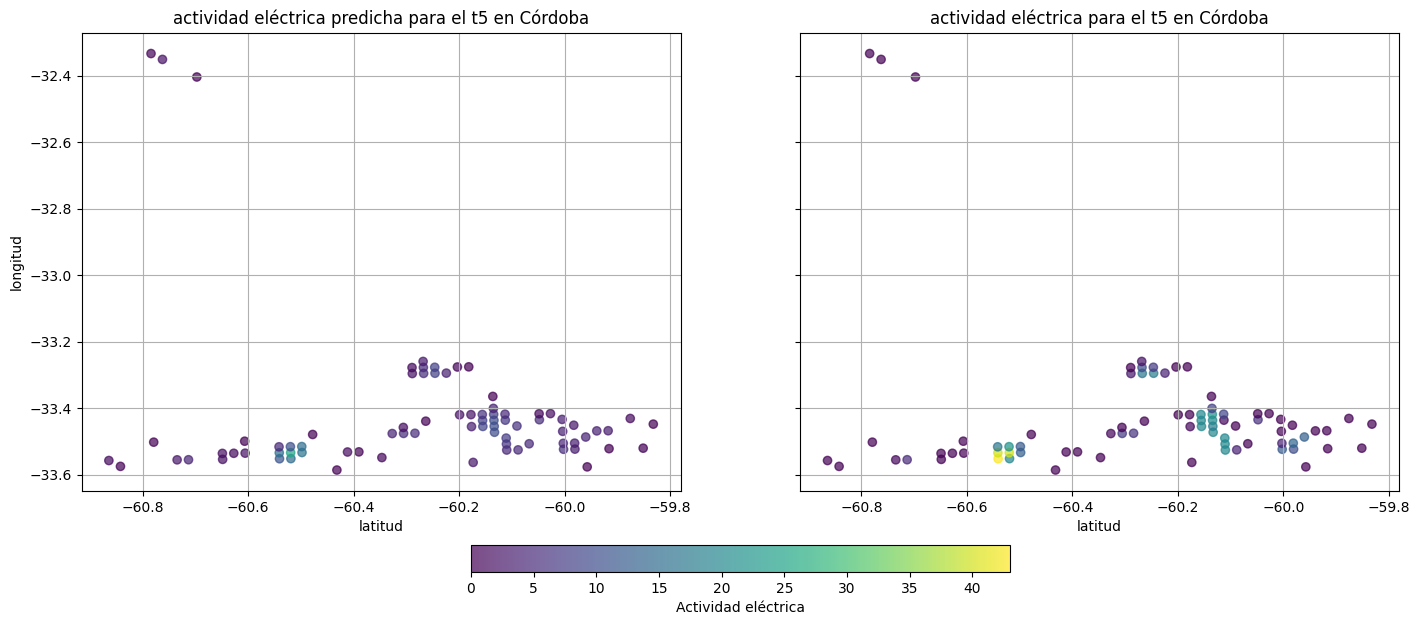

In [ ]:
vmin = min(df_test_t5['pred'].min(), df_test_t5['LIGHT'].min())
vmax = max(df_test_t5['pred'].max(), df_test_t5['LIGHT'].max())

fig, ax = plt.subplots(1, 2, figsize=(17, 7), sharex=True, sharey=True)

scatter1 = ax[0].scatter(df_test_t5['lons'], df_test_t5['lats'], c=df_test_t5['pred'], cmap='viridis', alpha=0.7, vmin=vmin, vmax=vmax)
ax[0].set_xlabel('latitud')
ax[0].set_ylabel('longitud')
ax[0].set_title('actividad eléctrica predicha para el t5 en Córdoba')
ax[0].grid(True)


scatter2 = ax[1].scatter(df_test_t5['lons'], df_test_t5['lats'], c=df_test_t5['LIGHT'], cmap='viridis', alpha=0.7, vmin=vmin, vmax=vmax)
ax[1].set_xlabel('latitud')
ax[1].set_title('actividad eléctrica para el t5 en Córdoba')
ax[1].grid(True)

# Crear una única colorbar fuera de los subplots
cbar = fig.colorbar(scatter1, ax=ax, orientation='horizontal', fraction=0.05, pad=0.1)
cbar.set_label('Actividad eléctrica')

# Ajustar layout
plt.tight_layout(rect=[0, 0.1, 0.1, 0.1])
plt.show()

Y observamos nuevamente que los resultados son muy parecidos a los obtenidos con el modelo de Random Forest.

# Conclusión final

Como conclsuión final podemos decir que no hay mucha diferencia en la performance que producen los dos modelos (RF y Red Neuronal). Ambos modelos obtuvieron buena performance en la validación del set original llegando a un R2 de 0.89 aproximadamente, dónde la variable más importante en ambos casos fue la integral de hielo.   
Finalmente, cuando se inenta predecir la actividad eléctrica en el nuevo data set , ambos modelos obtienen una performance baja con un R2 cercano a 0.55. Analizando en detalle este ultimo data set observamos que no es una muestra aleatoria en tiempo y espacio de las columnas de dominio sino que se observa que las columnas estan medidas por intervalo de tiempo ( la misma  columna n veces) y además hay columnas más cercanas que otras. Esto a nuestra consideración produce una estructura espacial y temporal que nuestro data set original no captura, por lo que la complejidad que logramos no es suficiente para poder predecir correctamente el data set de testeo. Para mejorar estos modelos, habria que modelar la autocorrelacion temporal y espacial de las columnas de dominio.